## **F20DL - PORTFOLIO**
This portfolio comprises of work on the FER-2013 dataset demonstarting it's results on various ML algorithms

<br />
https://www.kaggle.com/ananthu017/emotion-detection-fer

In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import skimage as sk
from skimage.filters import try_all_threshold
import skimage.filters as filters
from skimage.transform import rotate
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from fcmeans import FCM
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### **Install OpenCV**
For pre-processing of the images, we will be using functions offered by the OpenCV library <br />
https://docs.opencv.org/4.5.3/index.html

In [5]:
!pip install opencv-python

In [6]:
import cv2 as cv

### **Import the FER-2013 dataset**

In [7]:
dataset = "/Users/Ayushi/ML CW/images"

#### **References**
Tutorialspoint.com. (2021). Python os.listdir() Method. [online] <br />Available at: https://www.tutorialspoint.com/python/os_listdir.htm.

<br />
Opencv.org. (2021). OpenCV: Color conversions. [online] <br />Available at: https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html. 


<br />
<br />
NewbeDEV. (2021). How to detect a full black color image in OpenCV Python? | Newbedev. [online] <br />Available at: https://newbedev.com/how-to-detect-a-full-black-color-image-in-opencv-python 



In [8]:
listImages = []
labels=[]

def loadingImagesFile(folderPath, emotionType,label):
    for pic in os.listdir(folderPath + "/" + emotionType):                      #(Tutorialspoint.com, 2021)
        im = cv.imread(os.path.join(folderPath, emotionType, pic), 1)
        im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)                        #(Opencv.org, 2021)
        if cv.countNonZero(im_gray) != 0:                                   #(NewbeDEV, 2021)
            listImages.append(im)
            labels.append(label)

In [9]:
loadingImagesFile(dataset, "angry",0)      
loadingImagesFile(dataset, "disgusted",1)
loadingImagesFile(dataset, "fearful",2)
loadingImagesFile(dataset, "happy",3)
loadingImagesFile(dataset, "neutral",4)
loadingImagesFile(dataset, "sad",5)
loadingImagesFile(dataset, "surprised",6)

### **Pre-process the images**

#### **References**
Jiwon Jeong (2019). Computer Vision for Beginners: Part 1 - Towards Data Science. [online] Medium. <br />Available at: https://towardsdatascience.com/computer-vision-for-beginners-part-1-7cca775f58ef.

<br />
Opencv.org. (2021). OpenCV: Color conversions. [online] <br />Available at: https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html. 

<br />
<br />
EDUCBA. (2021). OpenCV Normalize | Working of normalize() function in OpenCV. [online] <br />Available at: https://www.educba.com/opencv-normalize/.

<br />
<br />
Engineering Education (EngEd) Program | Section. (2021). Getting Started with Image Preprocessing in Python. [online] Available at: https://www.section.io/engineering-education/image-preprocessing-in-python/.

<br />
<br />
Scikit-image.org. (2021). Thresholding — skimage v0.18.0 docs. [online] <br />Available at: https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html.

In [11]:
processedArray = []
processedArrayBW = [] 


postNorm = np.zeros((48, 48))

def imagePreprocess(imageList):
    for i in range(len(imageList)):
        actualImage = cv.cvtColor(imageList[i], cv.COLOR_BGR2RGB)              #(Jiwon Jeong, 2019)
        processedArray.append(actualImage)
        actual2hsv = cv.cvtColor(actualImage, cv.COLOR_BGR2HSV)                #(Opencv.org, 2021)
        actual2bw = cv.cvtColor(actual2hsv, cv.COLOR_BGR2GRAY)                 #(Jiwon Jeong, 2019)
        actual2bw_norm = cv.normalize(actual2bw, postNorm, 0, 350, cv.NORM_MINMAX)      #(EDUCBA, 2021) (Engineering Education (EngEd) Program | Section, 2021)
        threshedImage = filters.threshold_mean(actual2bw_norm)                          #(Scikit-image.org, 2021)
        processedArrayBW.append(actual2bw_norm < threshedImage)

        
        
        
#####    ANALYSIS

"""
1) threshold_isodata = 23%
2) threshold_li = 22%
3) threshold_local = 17% (35), 19% (25), 20% (15), 21% (5)
4) threshold_multiotsu = problem
5) threshold_niblack = 19%, 18%
6) threshold_sauvola = 18%
7) threshold_triangle = 19%
8) threshold_yen = 20%
9) threshold_otsu = 22%, 21%
10) threshold_minimum = error
11) prewitt = 23%, 24%, 25% (edge detection)
12) gaussian = 21%
13) sobel = 23%
14) cv.THRESH_BINARY_INV = 21%
15) cv.THRESH_TRUNC = 19%, 20%
16) cv.THRESH_TOZERO = 22%, 21%, 20%
17) cv.THRESH_TOZERO_INV = 19%, 20%, 21%
"""

'\n1) threshold_isodata = 23%\n2) threshold_li = 22%\n3) threshold_local = 17% (35), 19% (25), 20% (15), 21% (5)\n4) threshold_multiotsu = problem\n5) threshold_niblack = 19%, 18%\n6) threshold_sauvola = 18%\n7) threshold_triangle = 19%\n8) threshold_yen = 20%\n9) threshold_otsu = 22%, 21%\n10) threshold_minimum = error\n11) prewitt = 23%, 24%, 25% (edge detection)\n12) gaussian = 21%\n13) sobel = 23%\n14) cv.THRESH_BINARY_INV = 21%\n15) cv.THRESH_TRUNC = 19%, 20%\n16) cv.THRESH_TOZERO = 22%, 21%, 20%\n17) cv.THRESH_TOZERO_INV = 19%, 20%, 21%\n'

In [12]:
imagePreprocess(listImages)

In [13]:
print(len(listImages))
print(len(processedArray))
print(len(processedArrayBW))

35875
35875
35875


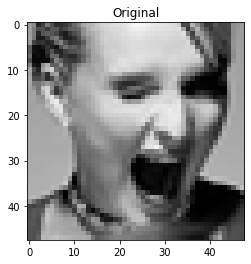

In [14]:
plt.imshow(listImages[56])
plt.title("Original")
plt.show()

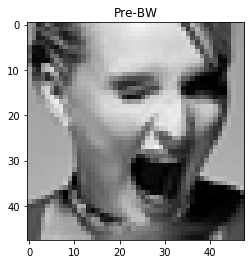

In [15]:
plt.imshow(processedArray[56])
plt.title("Pre-BW")
plt.show()

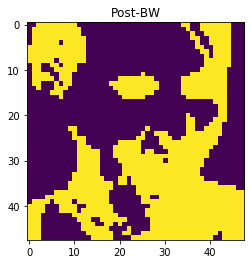

In [16]:
plt.imshow(processedArrayBW[56])
plt.title("Post-BW")
plt.show()

In [17]:
print(type(listImages[56]))
print(type(listImages))

<class 'numpy.ndarray'>
<class 'list'>


### **Flatten the image array**

#### **References**
GeeksforGeeks. (2021). Impact of Image Flattening - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/impact-of-image-flattening/.

<br />
w3resource. (2020). NumPy Array manipulation: reshape() function - w3resource. [online] Available at: https://www.w3resource.com/numpy/manipulation/reshape.php.


In [18]:
processedArrayBWCopy = processedArrayBW.copy()
print(type(processedArrayBWCopy))

<class 'list'>


In [19]:
imgArr = np.array(processedArrayBWCopy)
imgArr_flatten = imgArr.flatten()                    #(GeeksforGeeks, 2021)

labelsArr = np.array(labels)

In [20]:
print(type(imgArr))
print(type(imgArr_flatten))
print(type(labels))
print(type(labelsArr))
print(processedArrayBW[56].shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
(48, 48)


In [21]:
print(len(processedArrayBW))
print(len(imgArr_flatten))
print(labelsArr)

35875
82656000
[0 0 0 ... 6 6 6]


In [22]:
print(imgArr.shape)
imgArr_flatten=np.reshape(imgArr_flatten, (35875, 2304))                #(w3resource, 2020)
print(len(imgArr_flatten))

(35875, 48, 48)
35875


### **Task 1 - Naive Bayes Classifier**

#### **References**
Dobilas, S. (2021). Naive Bayes Classifier — How to Successfully Use It in Python? [online] Medium. <br />Available at: https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(imgArr_flatten, labelsArr, test_size=0.3)

In [24]:
modelVar = BernoulliNB()             #(Dobilas, 2021)

In [25]:
clf = modelVar.fit(x_train, y_train)

In [26]:
clf.score(x_test, y_test)

0.2500232277246121

### **Naive Bayes Classifier - Metrics**

#### **References**
Boaz Shmueli (2019). Multi-Class Metrics Made Simple, Part I: Precision and Recall. [online] Medium. <br />Available at: https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2.

<br />
Serafeim Loukas (2020). Multi-class Classification: Extracting Performance Metrics From The Confusion Matrix. [online] Medium. <br />Available at: https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872.

<br />
<br />
GeeksforGeeks. (2020). Calculate the sum of all columns in a 2D NumPy array - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/calculate-the-sum-of-all-columns-in-a-2d-numpy-array/.

<br />
<br />
Ronaldinho Learn Coding (2012). Find length of 2D array Python. [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/10713004/find-length-of-2d-array-python/10713016 [Accessed 24 Nov. 2021].

In [28]:
classArr = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

modelPred = clf.predict(x_test)
print(metrics.classification_report(y_test, modelPred, target_names=classArr))            #(Boaz Shmueli, 2019)

              precision    recall  f1-score   support

       angry       0.24      0.18      0.20      1446
   disgusted       0.03      0.28      0.05       152
     fearful       0.18      0.07      0.10      1520
       happy       0.41      0.30      0.34      2695
     neutral       0.26      0.28      0.27      1880
         sad       0.27      0.25      0.26      1848
   surprised       0.26      0.41      0.32      1222

    accuracy                           0.25     10763
   macro avg       0.23      0.25      0.22     10763
weighted avg       0.28      0.25      0.26     10763



In [29]:
met = metrics.confusion_matrix(y_test, modelPred)                        #(Boaz Shmueli, 2019)
print(met)

[[260 207  85 236 216 231 211]
 [ 11  42   9  23  23  15  29]
 [162 229 101 210 212 266 340]
 [239 380 128 800 447 361 340]
 [146 221  81 294 519 318 301]
 [208 257  93 244 373 470 203]
 [ 77 161  74 161 170  80 499]]


In [30]:
print(type(metrics.confusion_matrix(y_test, modelPred)))

<class 'numpy.ndarray'>


In [31]:
tpList = []
for i in range(len(met)):
    tpList.append(met[i][i])
    
tpListArr = np.array(tpList)

print(type(tpListArr))

<class 'numpy.ndarray'>


In [32]:
angryTP = tpListArr[0]
angryFN = []

print("Angry TP Value = ", angryTP)

for i in range(len(met[0])):                           #(Ronaldinho Learn Coding, 2012)
    angryFN.append(met[0][i])
    
angryFNArr = np.array(angryFN)
angryFNValue = np.sum(angryFNArr) - angryTP

print("Angry FN Value = ", angryFNValue)

angryFP = []

for j in range(len(met)):
    angryFP.append(met[j][0])
    
angryFPArr = np.array(angryFP)
angryFPValue = np.sum(angryFPArr) - angryTP

print("Angry FP Value = ", angryFPValue)

angryTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        angryTN += met[i][j]                                #(GeeksforGeeks, 2020)
        
angryTNValue = angryTN - angryFPValue - angryFNValue - angryTP

print("Angry TN Value = ", angryTNValue)

angryTPR = angryTP / (angryTP + angryFNValue)

print("Angry TP Rate Value = ", angryTPR)

angryFPR = angryFPValue / (angryFPValue + angryTNValue)

print("Angry FP Rate Value = ", angryFPR)

Angry TP Value =  260
Angry FN Value =  1186
Angry FP Value =  843
Angry TN Value =  8474
Angry TP Rate Value =  0.1798063623789765
Angry FP Rate Value =  0.09047976816571858


In [33]:
disgustedTP = tpListArr[1]
disgustedFN = []

print("Disgusted TP Value = ", disgustedTP)

for i in range(len(met[1])):                                  #(Ronaldinho Learn Coding, 2012)
    disgustedFN.append(met[1][i])
    
disgustedFNArr = np.array(disgustedFN)
disgustedFNValue = np.sum(disgustedFNArr) - disgustedTP

print("Disgusted FN Value = ", disgustedFNValue)

disgustedFP = []

for j in range(len(met)):
    disgustedFP.append(met[j][1])
    
disgustedFPArr = np.array(disgustedFP)
disgustedFPValue = np.sum(disgustedFPArr) - disgustedTP

print("Disgusted FP Value = ", disgustedFPValue)

disgustedTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        disgustedTN += met[i][j]                         #(GeeksforGeeks, 2020)
        
disgustedTNValue = disgustedTN - disgustedFPValue - disgustedFNValue - disgustedTP

print("Disgusted TN Value = ", disgustedTNValue)

disgustedTPR = disgustedTP / (disgustedTP + disgustedFNValue)

print("Disgusted TP Rate Value = ", disgustedTPR)

disgustedFPR = disgustedFPValue / (disgustedFPValue + disgustedTNValue)

print("Disgusted FP Rate Value = ", disgustedFPR)

Disgusted TP Value =  42
Disgusted FN Value =  110
Disgusted FP Value =  1455
Disgusted TN Value =  9156
Disgusted TP Rate Value =  0.27631578947368424
Disgusted FP Rate Value =  0.1371218546791066


In [34]:
fearfulTP = tpListArr[2]
fearfulFN = []

print("Fearful TP Value = ", fearfulTP)

for i in range(len(met[2])):                                      #(Ronaldinho Learn Coding, 2012)
    fearfulFN.append(met[2][i])
    
fearfulFNArr = np.array(fearfulFN)
fearfulFNValue = np.sum(fearfulFNArr) - fearfulTP

print("Fearful FN Value = ", fearfulFNValue)

fearfulFP = []

for j in range(len(met)):
    fearfulFP.append(met[j][2])
    
fearfulFPArr = np.array(fearfulFP)
fearfulFPValue = np.sum(fearfulFPArr) - fearfulTP

print("Fearful FP Value = ", fearfulFPValue)

fearfulTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        fearfulTN += met[i][j]                                   #(GeeksforGeeks, 2020)
        
fearfulTNValue = fearfulTN - fearfulFPValue - fearfulFNValue - fearfulTP

print("Fearful TN Value = ", fearfulTNValue)

fearfulTPR = fearfulTP / (fearfulTP + fearfulFNValue)

print("Fearful TP Rate Value = ", fearfulTPR)

fearfulFPR = fearfulFPValue / (fearfulFPValue + fearfulTNValue)

print("Fearful FP Rate Value = ", fearfulFPR)

Fearful TP Value =  101
Fearful FN Value =  1419
Fearful FP Value =  470
Fearful TN Value =  8773
Fearful TP Rate Value =  0.06644736842105263
Fearful FP Rate Value =  0.05084929135562047


In [35]:
happyTP = tpListArr[3]
happyFN = []

print("Happy TP Value = ", happyTP)

for i in range(len(met[3])):                                    #(Ronaldinho Learn Coding, 2012)
    happyFN.append(met[3][i])
    
happyFNArr = np.array(happyFN)
happyFNValue = np.sum(happyFNArr) - happyTP

print("Happy FN Value = ", happyFNValue)

happyFP = []

for j in range(len(met)):
    happyFP.append(met[j][3])
    
happyFPArr = np.array(happyFP)
happyFPValue = np.sum(happyFPArr) - happyTP

print("Happy FP Value = ", happyFPValue)

happyTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        happyTN += met[i][j]                                       #(GeeksforGeeks, 2020)
        
happyTNValue = happyTN - happyFPValue - happyFNValue - happyTP

print("Happy TN Value = ", happyTNValue)

happyTPR = happyTP / (happyTP + happyFNValue)

print("Happy TP Rate Value = ", happyTPR)

happyFPR = happyFPValue / (happyFPValue + happyTNValue)

print("Happy FP Rate Value = ", happyFPR)

Happy TP Value =  800
Happy FN Value =  1895
Happy FP Value =  1168
Happy TN Value =  6900
Happy TP Rate Value =  0.29684601113172543
Happy FP Rate Value =  0.14476945959345563


In [36]:
neutralTP = tpListArr[4]
neutralFN = []

print("Neutral TP Value = ", neutralTP)

for i in range(len(met[4])):                                      #(Ronaldinho Learn Coding, 2012)
    neutralFN.append(met[4][i])
    
neutralFNArr = np.array(neutralFN)
neutralFNValue = np.sum(neutralFNArr) - neutralTP

print("Neutral FN Value = ", neutralFNValue)

neutralFP = []

for j in range(len(met)):
    neutralFP.append(met[j][4])
    
neutralFPArr = np.array(neutralFP)
neutralFPValue = np.sum(neutralFPArr) - neutralTP

print("Neutral FP Value = ", neutralFPValue)

neutralTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        neutralTN += met[i][j]                                   #(GeeksforGeeks, 2020)
        
neutralTNValue = neutralTN - neutralFPValue - neutralFNValue - neutralTP

print("Neutral TN Value = ", neutralTNValue)

neutralTPR = neutralTP / (neutralTP + neutralFNValue)

print("Neutral TP Rate Value = ", neutralTPR)

neutralFPR = neutralFPValue / (neutralFPValue + neutralTNValue)

print("Neutral FP Rate Value = ", neutralFPR)

Neutral TP Value =  519
Neutral FN Value =  1361
Neutral FP Value =  1441
Neutral TN Value =  7442
Neutral TP Rate Value =  0.27606382978723404
Neutral FP Rate Value =  0.16221997073060904


In [37]:
sadTP = tpListArr[5]
sadFN = []

print("Sad TP Value = ", sadTP)

for i in range(len(met[5])):                               #(Ronaldinho Learn Coding, 2012)
    sadFN.append(met[5][i])
    
sadFNArr = np.array(sadFN)
sadFNValue = np.sum(sadFNArr) - sadTP

print("Sad FN Value = ", sadFNValue)

sadFP = []

for j in range(len(met)):
    sadFP.append(met[j][5])
    
sadFPArr = np.array(sadFP)
sadFPValue = np.sum(sadFPArr) - sadTP

print("Sad FP Value = ", sadFPValue)

sadTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        sadTN += met[i][j]                                      #(GeeksforGeeks, 2020)
        
sadTNValue = sadTN - sadFPValue - sadFNValue - sadTP

print("Sad TN Value = ", sadTNValue)

sadTPR = sadTP / (sadTP + sadFNValue)

print("Sad TP Rate Value = ", sadTPR)

sadFPR = sadFPValue / (sadFPValue + sadTNValue)

print("Sad FP Rate Value = ", sadFPR)

Sad TP Value =  470
Sad FN Value =  1378
Sad FP Value =  1271
Sad TN Value =  7644
Sad TP Rate Value =  0.25432900432900435
Sad FP Rate Value =  0.14256870443073472


In [38]:
surprisedTP = tpListArr[6]
surprisedFN = []

print("Surprised TP Value = ", surprisedTP)

for i in range(len(met[6])):                                           #(Ronaldinho Learn Coding, 2012)
    surprisedFN.append(met[6][i])
    
surprisedFNArr = np.array(surprisedFN)
surprisedFNValue = np.sum(surprisedFNArr) - surprisedTP

print("Surprised FN Value = ", surprisedFNValue)

surprisedFP = []

for j in range(len(met)):
    surprisedFP.append(met[j][6])
    
surprisedFPArr = np.array(surprisedFP)
surprisedFPValue = np.sum(surprisedFPArr) - surprisedTP

print("Surprised FP Value = ", surprisedFPValue)

surprisedTN = 0
for i in range(len(met)):
    for j in range(len(met[i])):
        surprisedTN += met[i][j]                                          #(GeeksforGeeks, 2020)
        
surprisedTNValue = surprisedTN - surprisedFPValue - surprisedFNValue - surprisedTP

print("Surprised TN Value = ", surprisedTNValue)

surprisedTPR = surprisedTP / (surprisedTP + surprisedFNValue)

print("Surprised TP Rate Value = ", surprisedTPR)

surprisedFPR = surprisedFPValue / (surprisedFPValue + surprisedTNValue)

print("Surprised FP Rate Value = ", surprisedFPR)

Surprised TP Value =  499
Surprised FN Value =  723
Surprised FP Value =  1424
Surprised TN Value =  8117
Surprised TP Rate Value =  0.4083469721767594
Surprised FP Rate Value =  0.14925060266219473


### **Feature Extraction and Correlation**

#### **References**
Aditya Sharma (2020). Python PCA (Principal Component Analysis) with Sklearn. [online] DataCamp Community. <br />Available at: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python.

<br />
Ponraj, A. (2021). A Tip A Day — Python Tip #8: Why should we Normalize image pixel values or divide by 255? | Dev Skrol. [online] Medium. <br />Available at: https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a.

<br />
<br />
koliyat9811 (2017). How to change column names in pandas Dataframe using a list of names? [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/47343838/how-to-change-column-names-in-pandas-dataframe-using-a-list-of-names.

<br />
<br />
GeeksforGeeks. (2018). Python | Pandas dataframe.groupby() - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/.

<br />
<br />
GeeksforGeeks. (2017). Underscore (_) in Python - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/underscore-_-python/.

<br />
<br />
w3resource. (2021). Python: Create a new empty set - w3resource. [online] <br />Available at: https://www.w3resource.com/python-exercises/sets/python-sets-exercise-1.php.

<br />
<br />
Brandt, K. (2013). List Highest Correlation Pairs from a Large Correlation Matrix in Pandas? [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas.

<br />
<br />
Pythontic.com. (2020). Finding correlation coefficient between columns of a pandas dataframe | Pythontic.com. [online] <br />Available at: https://pythontic.com/pandas/dataframe-computations/correlation.

<br />
<br />
Brandt, K. (2013). List Highest Correlation Pairs from a Large Correlation Matrix in Pandas? [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas.

<br />
<br />
Datatofish.com. (2018). How to Sort Pandas DataFrame (with examples) - Data to Fish. [online] <br />Available at: https://datatofish.com/sort-pandas-dataframe/.

<br />
<br />
GeeksforGeeks. (2019). Python | Pandas Series.keys() - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/python-pandas-series-keys/.

<br />
<br />
GeeksforGeeks. (2020). Python Pandas - DataFrame.copy() function - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-copy-function/.

<br />
<br />
turtle (2013). Apply function to pandas groupby. [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/15374597/apply-function-to-pandas-groupby.

In [39]:
classEmotion = {
 0: 'angry',
 1: 'disgusted',
 2: 'fearful',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised' 
}

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25112, 2304)
(10763, 2304)
(25112,)
(10763,)


In [41]:
#so that computation becomes faster
x_train = x_train/255              #(Ponraj, 2021)

In [42]:
pixelNos = []

for i in range(2304):
    pixel = "Pixel No. " + str(i)
    pixelNos.append(pixel)

In [43]:
print(len(pixelNos))

2304


In [44]:
pixelNos[2303]

'Pixel No. 2303'

In [45]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157]])

In [46]:
df_emo = pd.DataFrame(x_train)          #(Aditya Sharma, 2020)

In [47]:
df_emo.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
df_emo.columns = pixelNos             #(koliyat9811, 2017)

In [49]:
df_emo.head()

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2294,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
df_emo['Class'] = y_train

In [51]:
df_emo.head()

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303,Class
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,5
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,2
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6


In [52]:
print(len(df_emo))

25112


In [53]:
classLabel = df_emo.groupby(['Class'])                #(GeeksforGeeks, 2018)

In [54]:
classLabel.first()

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2294,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303
Class,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000
6,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
classLabel.get_group(0)

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2294,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
25,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922
33,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922
25097,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25098,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
25101,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
print(type(classLabel))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [57]:
df_emoList= []

for _, i in classLabel:                         #(GeeksforGeeks, 2017)
    df_emoList.append(i)

In [58]:
print(len(df_emoList))

7


In [59]:
print(type(df_emoList))

<class 'list'>


In [60]:
df_emoList

[       Pixel No. 0  Pixel No. 1  Pixel No. 2  Pixel No. 3  Pixel No. 4  \
 16        0.000000     0.000000     0.000000     0.000000     0.000000   
 20        0.000000     0.000000     0.000000     0.000000     0.000000   
 25        0.003922     0.003922     0.003922     0.003922     0.003922   
 33        0.003922     0.003922     0.003922     0.003922     0.003922   
 34        0.000000     0.000000     0.000000     0.000000     0.000000   
 ...            ...          ...          ...          ...          ...   
 25096     0.003922     0.003922     0.003922     0.003922     0.003922   
 25097     0.000000     0.000000     0.000000     0.000000     0.003922   
 25098     0.003922     0.003922     0.003922     0.003922     0.003922   
 25101     0.000000     0.003922     0.003922     0.003922     0.003922   
 25109     0.003922     0.003922     0.003922     0.003922     0.003922   
 
        Pixel No. 5  Pixel No. 6  Pixel No. 7  Pixel No. 8  Pixel No. 9  ...  \
 16        0.00000

In [68]:
df_emotion = []

for ele in df_emoList:
    df_emotion.append(pd.DataFrame(ele))

In [69]:
print(type(df_emotion[0]))
df_emotion[0].head()

<class 'pandas.core.frame.DataFrame'>


,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303,Class
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
25,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0
33,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [70]:
print(type(df_emotion))

<class 'list'>


In [73]:
print(df_emotion[1].shape)

(395, 2305)


In [74]:
df_emotion[1].columns

Index(['Pixel No. 0', 'Pixel No. 1', 'Pixel No. 2', 'Pixel No. 3',
       'Pixel No. 4', 'Pixel No. 5', 'Pixel No. 6', 'Pixel No. 7',
       'Pixel No. 8', 'Pixel No. 9',
       ...
       'Pixel No. 2295', 'Pixel No. 2296', 'Pixel No. 2297', 'Pixel No. 2298',
       'Pixel No. 2299', 'Pixel No. 2300', 'Pixel No. 2301', 'Pixel No. 2302',
       'Pixel No. 2303', 'Class'],
      dtype='object', length=2305)

In [ ]:
angryTop = get_top_abs_correlations(df_list, 0, 10)
disgustedTop = get_top_abs_correlations(df_list, 1, 10)
fearfulTop = get_top_abs_correlations(df_list, 2, 10)
happyTop = get_top_abs_correlations(df_list, 3, 10)
neutralTop = get_top_abs_correlations(df_list, 4, 10)
sadTop = get_top_abs_correlations(df_list, 5, 10)
surprisedTop = get_top_abs_correlations(df_list, 6, 10)

In [79]:
def correlation(df_emo, clss, numPair):
    repeatPairs = set()                     #(w3resource, 2021)
    column = df_emo[clss].columns
    for i in range(0, 2305):
        for j in range(0, i+1):
            repeatPairs.add((column[i], column[j]))
    corrMatrix = df_emo[clss].corr(method ='pearson').abs()                      #(Pythontic.com, 2020)
    unstackCorrMatrix = corrMatrix.unstack()                         #(Brandt, 2013)
    unstackCorrMatrix = unstackCorrMatrix.drop(labels=repeatPairs)
    sortUnstackCorrMatrix = unstackCorrMatrix.sort_values(ascending=False)        #(Datatofish.com, 2018)
    return sortUnstackCorrMatrix[0:numPair]

In [80]:
angryTop = correlation(df_emotion, 0, 10)
disgustedTop = correlation(df_emotion, 1, 10)
fearfulTop = correlation(df_emotion, 2, 10)
happyTop = correlation(df_emotion, 3, 10)
neutralTop = correlation(df_emotion, 4, 10)
sadTop = correlation(df_emotion, 5, 10)
surprisedTop = correlation(df_emotion, 6, 10)

print("Angry Top Correlations - \n", angryTop)
print("------------------------------------------------")
print("Disgusted Top Correlations - \n", disgustedTop)
print("------------------------------------------------")
print("Fearful Top Correlations - \n", fearfulTop)
print("------------------------------------------------")
print("Happy Top Correlations - \n", happyTop)
print("------------------------------------------------")
print("Neutral Top Correlations - \n", neutralTop)
print("------------------------------------------------")
print("Sad Top Correlations - \n", sadTop)
print("------------------------------------------------")
print("Surprised Top Correlations - \n", surprisedTop)

Angry Top Correlations - 
 Pixel No. 49   Pixel No. 97     0.922082
Pixel No. 48   Pixel No. 96     0.920304
Pixel No. 143  Pixel No. 191    0.920194
Pixel No. 2    Pixel No. 50     0.919208
Pixel No. 47   Pixel No. 95     0.917034
Pixel No. 288  Pixel No. 336    0.916211
Pixel No. 240  Pixel No. 288    0.915655
Pixel No. 0    Pixel No. 48     0.915419
Pixel No. 98   Pixel No. 146    0.915373
Pixel No. 96   Pixel No. 144    0.914979
dtype: float64
------------------------------------------------
Disgusted Top Correlations - 
 Pixel No. 192   Pixel No. 240     0.966488
Pixel No. 144   Pixel No. 192     0.965929
Pixel No. 145   Pixel No. 193     0.965726
Pixel No. 1     Pixel No. 49      0.965726
Pixel No. 1775  Pixel No. 1823    0.963948
Pixel No. 1672  Pixel No. 1720    0.963208
Pixel No. 576   Pixel No. 624     0.962538
Pixel No. 1630  Pixel No. 1678    0.959787
Pixel No. 1875  Pixel No. 1923    0.959469
Pixel No. 2064  Pixel No. 2112    0.959304
dtype: float64
-----------------------

In [81]:
print(pd.Series.keys(angryTop))

MultiIndex([( 'Pixel No. 49',  'Pixel No. 97'),
            ( 'Pixel No. 48',  'Pixel No. 96'),
            ('Pixel No. 143', 'Pixel No. 191'),
            (  'Pixel No. 2',  'Pixel No. 50'),
            ( 'Pixel No. 47',  'Pixel No. 95'),
            ('Pixel No. 288', 'Pixel No. 336'),
            ('Pixel No. 240', 'Pixel No. 288'),
            (  'Pixel No. 0',  'Pixel No. 48'),
            ( 'Pixel No. 98', 'Pixel No. 146'),
            ( 'Pixel No. 96', 'Pixel No. 144')],
           )


In [84]:
print(pd.Series.keys(angryTop)[0])

('Pixel No. 49', 'Pixel No. 97')


In [83]:
print(type(angryTop))

<class 'pandas.core.series.Series'>


In [85]:
arrAngryFeature = []

for i in range(len(pd.Series.keys(angryTop))):      #(GeeksforGeeks, 2019)
    for j in range(2):
        angryFeature = pd.Series.keys(angryTop)[i][j]
        arrAngryFeature.append(angryFeature)
        
print(len(arrAngryFeature))
print(arrAngryFeature)

20
['Pixel No. 49', 'Pixel No. 97', 'Pixel No. 48', 'Pixel No. 96', 'Pixel No. 143', 'Pixel No. 191', 'Pixel No. 2', 'Pixel No. 50', 'Pixel No. 47', 'Pixel No. 95', 'Pixel No. 288', 'Pixel No. 336', 'Pixel No. 240', 'Pixel No. 288', 'Pixel No. 0', 'Pixel No. 48', 'Pixel No. 98', 'Pixel No. 146', 'Pixel No. 96', 'Pixel No. 144']


In [86]:
arrDisgustedFeature = []

for i in range(len(pd.Series.keys(disgustedTop))):               #(GeeksforGeeks, 2019)
    for j in range(2):
        disgustedFeature = pd.Series.keys(disgustedTop)[i][j]
        arrDisgustedFeature.append(disgustedFeature)
        
print(len(arrDisgustedFeature))
print(arrDisgustedFeature)

20
['Pixel No. 192', 'Pixel No. 240', 'Pixel No. 144', 'Pixel No. 192', 'Pixel No. 145', 'Pixel No. 193', 'Pixel No. 1', 'Pixel No. 49', 'Pixel No. 1775', 'Pixel No. 1823', 'Pixel No. 1672', 'Pixel No. 1720', 'Pixel No. 576', 'Pixel No. 624', 'Pixel No. 1630', 'Pixel No. 1678', 'Pixel No. 1875', 'Pixel No. 1923', 'Pixel No. 2064', 'Pixel No. 2112']


In [87]:
arrFearfulFeature = []

for i in range(len(pd.Series.keys(fearfulTop))):            #(GeeksforGeeks, 2019) 
    for j in range(2):
        fearfulFeature = pd.Series.keys(fearfulTop)[i][j]
        arrFearfulFeature.append(fearfulFeature)
        
print(len(arrFearfulFeature))
print(arrFearfulFeature)

20
['Pixel No. 239', 'Pixel No. 287', 'Pixel No. 527', 'Pixel No. 575', 'Pixel No. 383', 'Pixel No. 431', 'Pixel No. 287', 'Pixel No. 335', 'Pixel No. 479', 'Pixel No. 527', 'Pixel No. 0', 'Pixel No. 48', 'Pixel No. 46', 'Pixel No. 94', 'Pixel No. 94', 'Pixel No. 142', 'Pixel No. 190', 'Pixel No. 238', 'Pixel No. 335', 'Pixel No. 383']


In [88]:
arrHappyFeature = []

for i in range(len(pd.Series.keys(happyTop))):               #(GeeksforGeeks, 2019)
    for j in range(2):
        happyFeature = pd.Series.keys(happyTop)[i][j]
        arrHappyFeature.append(happyFeature)
        
print(len(arrHappyFeature))
print(arrHappyFeature)

20
['Pixel No. 0', 'Pixel No. 48', 'Pixel No. 240', 'Pixel No. 288', 'Pixel No. 193', 'Pixel No. 241', 'Pixel No. 577', 'Pixel No. 625', 'Pixel No. 334', 'Pixel No. 382', 'Pixel No. 288', 'Pixel No. 336', 'Pixel No. 335', 'Pixel No. 383', 'Pixel No. 432', 'Pixel No. 480', 'Pixel No. 382', 'Pixel No. 430', 'Pixel No. 336', 'Pixel No. 384']


In [89]:
arrNeutralFeature = []

for i in range(len(pd.Series.keys(neutralTop))):                 #(GeeksforGeeks, 2019)
    for j in range(2):
        neutralFeature = pd.Series.keys(neutralTop)[i][j]
        arrNeutralFeature.append(neutralFeature)
        
print(len(arrNeutralFeature))
print(arrNeutralFeature)

20
['Pixel No. 95', 'Pixel No. 143', 'Pixel No. 193', 'Pixel No. 241', 'Pixel No. 47', 'Pixel No. 95', 'Pixel No. 143', 'Pixel No. 191', 'Pixel No. 191', 'Pixel No. 239', 'Pixel No. 46', 'Pixel No. 94', 'Pixel No. 96', 'Pixel No. 144', 'Pixel No. 97', 'Pixel No. 145', 'Pixel No. 239', 'Pixel No. 287', 'Pixel No. 194', 'Pixel No. 242']


In [90]:
arrSadFeature = []

for i in range(len(pd.Series.keys(sadTop))):              #(GeeksforGeeks, 2019)
    for j in range(2):
        sadFeature = pd.Series.keys(sadTop)[i][j]
        arrSadFeature.append(sadFeature)
        
print(len(arrSadFeature))
print(arrSadFeature)

20
['Pixel No. 144', 'Pixel No. 192', 'Pixel No. 143', 'Pixel No. 191', 'Pixel No. 1825', 'Pixel No. 1873', 'Pixel No. 1', 'Pixel No. 49', 'Pixel No. 145', 'Pixel No. 193', 'Pixel No. 1537', 'Pixel No. 1585', 'Pixel No. 192', 'Pixel No. 240', 'Pixel No. 191', 'Pixel No. 239', 'Pixel No. 0', 'Pixel No. 48', 'Pixel No. 288', 'Pixel No. 336']


In [91]:
arrSurprisedFeature = []

for i in range(len(pd.Series.keys(surprisedTop))):                #(GeeksforGeeks, 2019)
    for j in range(2):
        surprisedFeature = pd.Series.keys(surprisedTop)[i][j]
        arrSurprisedFeature.append(surprisedFeature)
        
print(len(arrSurprisedFeature))
print(arrSurprisedFeature)

20
['Pixel No. 431', 'Pixel No. 479', 'Pixel No. 287', 'Pixel No. 335', 'Pixel No. 190', 'Pixel No. 238', 'Pixel No. 240', 'Pixel No. 288', 'Pixel No. 191', 'Pixel No. 239', 'Pixel No. 0', 'Pixel No. 48', 'Pixel No. 432', 'Pixel No. 480', 'Pixel No. 527', 'Pixel No. 575', 'Pixel No. 383', 'Pixel No. 431', 'Pixel No. 625', 'Pixel No. 673']


In [92]:
emoDict = {
    0: arrAngryFeature,
    1: arrDisgustedFeature,
    2: arrFearfulFeature,
    3: arrHappyFeature,
    4: arrNeutralFeature,
    5: arrSadFeature,
    6: arrSurprisedFeature
}

In [93]:
df_emoCopy = df_emo.copy(deep=True)      #(GeeksforGeeks, 2020)

In [94]:
df_emoCopy.head()

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303,Class
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,5
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,2
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6


In [95]:
def changeVal(emoName):
    print(emoName.name)
    
    for ele in emoName.columns[:-1]:
        if (ele not in emoDict.get(emoName.name)):
            emoName[ele] = 0
    return emoName
            
    
classDF = df_emoCopy.groupby('Class')                  #(turtle, 2013)
df_copiez = classDF.apply(changeVal)

0
1
2
3
4
5
6


In [96]:
df_copiez.head(7)

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303,Class
0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0.000000,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0.003922,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0.003922,0.003922,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0.003922,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,0.003922,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0.003922,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [97]:
print(type(emoDict))

<class 'dict'>


In [98]:
print(emoDict.get(0))

['Pixel No. 49', 'Pixel No. 97', 'Pixel No. 48', 'Pixel No. 96', 'Pixel No. 143', 'Pixel No. 191', 'Pixel No. 2', 'Pixel No. 50', 'Pixel No. 47', 'Pixel No. 95', 'Pixel No. 288', 'Pixel No. 336', 'Pixel No. 240', 'Pixel No. 288', 'Pixel No. 0', 'Pixel No. 48', 'Pixel No. 98', 'Pixel No. 146', 'Pixel No. 96', 'Pixel No. 144']


In [99]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df_copiez, df_copiez['Class'], test_size=0.2)

In [100]:
modelVar1 = BernoulliNB()

In [101]:
clf1 = modelVar1.fit(x1_train, y1_train)

In [102]:
clf1.score(x1_test, y1_test)

0.8905036830579335

In [103]:
classArr1 = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

modelPred1 = clf1.predict(x1_test)
print(metrics.classification_report(y1_test, modelPred1, target_names=classArr1))          #(Boaz Shmueli, 2019)

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       675
   disgusted       1.00      0.93      0.96        84
     fearful       0.61      1.00      0.76       729
       happy       0.98      0.89      0.93      1261
     neutral       0.93      0.86      0.90       872
         sad       1.00      0.86      0.92       808
   surprised       0.98      0.71      0.82       594

    accuracy                           0.89      5023
   macro avg       0.93      0.89      0.90      5023
weighted avg       0.92      0.89      0.90      5023



In [104]:
met1 = metrics.confusion_matrix(y1_test, modelPred1)              #(Boaz Shmueli, 2019)
print(met1)

[[ 675    0    0    0    0    0    0]
 [   0   78    5    0    0    1    0]
 [   0    0  729    0    0    0    0]
 [   0    0  132 1125    1    0    3]
 [   0    0  118    0  752    0    2]
 [   0    0   50    6   53  695    4]
 [   0    0  154   21    0    0  419]]


In [105]:
tpList1 = []
for i in range(len(met1)):
    tpList1.append(met1[i][i])
    
tpListArr1 = np.array(tpList1)

print(type(tpListArr1))

<class 'numpy.ndarray'>


In [106]:
angryTP1 = tpListArr1[0]
angryFN1 = []

print("Angry TP Value = ", angryTP1)

for i in range(len(met1[0])):                      #(Ronaldinho Learn Coding, 2012)
    angryFN1.append(met1[0][i])
    
angryFNArr1 = np.array(angryFN1)
angryFNValue1 = np.sum(angryFNArr1) - angryTP1

print("Angry FN Value = ", angryFNValue1)

angryFP1 = []

for j in range(len(met1)):
    angryFP1.append(met1[j][0])
    
angryFP1Arr = np.array(angryFP1)
angryFP1Value = np.sum(angryFP1Arr) - angryTP1

print("Angry FP Value = ", angryFP1Value)

angryTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        angryTN1 += met1[i][j]                          #(GeeksforGeeks, 2020)
        
angryTN1Value = angryTN1 - angryFP1Value - angryFNValue1 - angryTP1

print("Angry TN Value = ", angryTN1Value)

angryTPR1 = angryTP1 / (angryTP1 + angryFNValue1)

print("Angry TP Rate Value = ", angryTPR1)

angryFPR1 = angryFP1Value / (angryFP1Value + angryTN1Value)

print("Angry FP Rate Value = ", angryFPR1)

Angry TP Value =  675
Angry FN Value =  0
Angry FP Value =  0
Angry TN Value =  4348
Angry TP Rate Value =  1.0
Angry FP Rate Value =  0.0


In [107]:
disgustedTP1 = tpListArr1[1]
disgustedFN1 = []

print("Disgusted TP Value = ", disgustedTP1)

for i in range(len(met1[1])):                   #(Ronaldinho Learn Coding, 2012)
    disgustedFN1.append(met1[1][i])
    
disgustedFN1Arr = np.array(disgustedFN1)
disgustedFN1Value = np.sum(disgustedFN1Arr) - disgustedTP1

print("Disgusted FN Value = ", disgustedFN1Value)

disgustedFP1 = []

for j in range(len(met1)):
    disgustedFP1.append(met1[j][1])
    
disgustedFP1Arr = np.array(disgustedFP1)
disgustedFP1Value = np.sum(disgustedFP1Arr) - disgustedTP1

print("Disgusted FP Value = ", disgustedFP1Value)

disgustedTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        disgustedTN1 += met1[i][j]                    #(GeeksforGeeks, 2020)
        
disgustedTN1Value = disgustedTN1 - disgustedFP1Value - disgustedFN1Value - disgustedTP1

print("Disgusted TN Value = ", disgustedTN1Value)

disgustedTPR1 = disgustedTP1 / (disgustedTP1 + disgustedFN1Value)

print("Disgusted TP Rate Value = ", disgustedTPR1)

disgustedFPR1 = disgustedFP1Value / (disgustedFP1Value + disgustedTN1Value)

print("Disgusted FP Rate Value = ", disgustedFPR1)

Disgusted TP Value =  78
Disgusted FN Value =  6
Disgusted FP Value =  0
Disgusted TN Value =  4939
Disgusted TP Rate Value =  0.9285714285714286
Disgusted FP Rate Value =  0.0


In [108]:
fearfulTP1 = tpListArr1[2]
fearfulFN1 = []

print("Fearful TP Value = ", fearfulTP1)

for i in range(len(met1[2])):                           #(Ronaldinho Learn Coding, 2012)
    fearfulFN1.append(met1[2][i])
    
fearfulFN1Arr = np.array(fearfulFN1)
fearfulFN1Value = np.sum(fearfulFN1Arr) - fearfulTP1

print("Fearful FN Value = ", fearfulFN1Value)

fearfulFP1 = []

for j in range(len(met1)):
    fearfulFP1.append(met1[j][2])
    
fearfulFP1Arr = np.array(fearfulFP1)
fearfulFP1Value = np.sum(fearfulFP1Arr) - fearfulTP1

print("Fearful FP Value = ", fearfulFP1Value)

fearfulTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        fearfulTN1 += met1[i][j]                             #(GeeksforGeeks, 2020)
        
fearfulTN1Value = fearfulTN1 - fearfulFP1Value - fearfulFN1Value - fearfulTP1

print("Fearful TN Value = ", fearfulTN1Value)

fearfulTPR1 = fearfulTP1 / (fearfulTP1 + fearfulFN1Value)

print("Fearful TP Rate Value = ", fearfulTPR1)

fearfulFPR1 = fearfulFP1Value / (fearfulFP1Value + fearfulTN1Value)

print("Fearful FP Rate Value = ", fearfulFPR1)

Fearful TP Value =  729
Fearful FN Value =  0
Fearful FP Value =  459
Fearful TN Value =  3835
Fearful TP Rate Value =  1.0
Fearful FP Rate Value =  0.10689333954354914


In [109]:
happyTP1 = tpListArr1[3]
happyFN1 = []

print("Happy TP Value = ", happyTP1)

for i in range(len(met1[3])):                          #(Ronaldinho Learn Coding, 2012)
    happyFN1.append(met1[3][i])
    
happyFN1Arr = np.array(happyFN1)
happyFN1Value = np.sum(happyFN1Arr) - happyTP1

print("Happy FN Value = ", happyFN1Value)

happyFP1 = []

for j in range(len(met1)):
    happyFP1.append(met1[j][3])
    
happyFP1Arr = np.array(happyFP1)
happyFP1Value = np.sum(happyFP1Arr) - happyTP1

print("Happy FP Value = ", happyFP1Value)

happyTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        happyTN1 += met1[i][j]                           #(GeeksforGeeks, 2020)
        
happyTN1Value = happyTN1 - happyFP1Value - happyFN1Value - happyTP1

print("Happy TN Value = ", happyTN1Value)

happyTPR1 = happyTP1 / (happyTP1 + happyFN1Value)

print("Happy TP Rate Value = ", happyTPR1)

happyFPR1 = happyFP1Value / (happyFP1Value + happyTN1Value)

print("Happy FP Rate Value = ", happyFPR1)

Happy TP Value =  1125
Happy FN Value =  136
Happy FP Value =  27
Happy TN Value =  3735
Happy TP Rate Value =  0.8921490880253767
Happy FP Rate Value =  0.007177033492822967


In [110]:
neutralTP1 = tpListArr1[4]
neutralFN1 = []

print("Neutral TP Value = ", neutralTP1)

for i in range(len(met1[4])):                                   #(Ronaldinho Learn Coding, 2012)
    neutralFN1.append(met1[4][i])
    
neutralFN1Arr = np.array(neutralFN1)
neutralFN1Value = np.sum(neutralFN1Arr) - neutralTP1

print("Neutral FN Value = ", neutralFN1Value)

neutralFP1 = []

for j in range(len(met1)):
    neutralFP1.append(met1[j][4])
    
neutralFP1Arr = np.array(neutralFP1)
neutralFP1Value = np.sum(neutralFP1Arr) - neutralTP1

print("Neutral FP Value = ", neutralFP1Value)

neutralTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        neutralTN1 += met1[i][j]                          #(GeeksforGeeks, 2020)
        
neutralTN1Value = neutralTN1 - neutralFP1Value - neutralFN1Value - neutralTP1

print("Neutral TN Value = ", neutralTN1Value)

neutralTPR1 = neutralTP1 / (neutralTP1 + neutralFN1Value)

print("Neutral TP Rate Value = ", neutralTPR1)

neutralFPR1 = neutralFP1Value / (neutralFP1Value + neutralTN1Value)

print("Neutral FP Rate Value = ", neutralFPR1)

Neutral TP Value =  752
Neutral FN Value =  120
Neutral FP Value =  54
Neutral TN Value =  4097
Neutral TP Rate Value =  0.8623853211009175
Neutral FP Rate Value =  0.013008913514815708


In [111]:
sadTP1 = tpListArr1[5]
sadFN1 = []

print("Sad TP Value = ", sadTP1)

for i in range(len(met1[5])):                     #(Ronaldinho Learn Coding, 2012)
    sadFN1.append(met1[5][i])
    
sadFN1Arr = np.array(sadFN1)
sadFN1Value = np.sum(sadFN1Arr) - sadTP1

print("Sad FN Value = ", sadFN1Value)

sadFP1 = []

for j in range(len(met1)):
    sadFP1.append(met1[j][5])
    
sadFP1Arr = np.array(sadFP1)
sadFP1Value = np.sum(sadFP1Arr) - sadTP1

print("Sad FP Value = ", sadFP1Value)

sadTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        sadTN1 += met1[i][j]                       #(GeeksforGeeks, 2020)
        
sadTN1Value = sadTN1 - sadFP1Value - sadFN1Value - sadTP1

print("Sad TN Value = ", sadTN1Value)

sadTPR1 = sadTP1 / (sadTP1 + sadFN1Value)

print("Sad TP Rate Value = ", sadTPR1)

sadFPR1 = sadFP1Value / (sadFP1Value + sadTN1Value)

print("Sad FP Rate Value = ", sadFPR1)

Sad TP Value =  695
Sad FN Value =  113
Sad FP Value =  1
Sad TN Value =  4214
Sad TP Rate Value =  0.8601485148514851
Sad FP Rate Value =  0.00023724792408066428


In [112]:
surprisedTP1 = tpListArr1[6]
surprisedFN1 = []

print("Surprised TP Value = ", surprisedTP1)

for i in range(len(met1[6])):                     #(Ronaldinho Learn Coding, 2012)
    surprisedFN1.append(met1[6][i])
    
surprisedFN1Arr = np.array(surprisedFN1)
surprisedFN1Value = np.sum(surprisedFN1Arr) - surprisedTP1

print("Surprised FN Value = ", surprisedFN1Value)

surprisedFP1 = []

for j in range(len(met1)):
    surprisedFP1.append(met1[j][6])
    
surprisedFP1Arr = np.array(surprisedFP1)
surprisedFP1Value = np.sum(surprisedFP1Arr) - surprisedTP1

print("Surprised FP Value = ", surprisedFP1Value)

surprisedTN1 = 0
for i in range(len(met1)):
    for j in range(len(met1[i])):
        surprisedTN1 += met1[i][j]                    #(GeeksforGeeks, 2020)
        
surprisedTN1Value = surprisedTN1 - surprisedFP1Value - surprisedFN1Value - surprisedTP1

print("Surprised TN Value = ", surprisedTN1Value)

surprisedTPR1 = surprisedTP1 / (surprisedTP1 + surprisedFN1Value)

print("Surprised TP Rate Value = ", surprisedTPR1)

surprisedFPR1 = surprisedFP1Value / (surprisedFP1Value + surprisedTN1Value)

print("Surprised FP Rate Value = ", surprisedFPR1)

Surprised TP Value =  419
Surprised FN Value =  175
Surprised FP Value =  9
Surprised TN Value =  4420
Surprised TP Rate Value =  0.7053872053872053
Surprised FP Rate Value =  0.0020320614134116052


In [113]:
angryTop2 = correlation(df_emotion, 0, 5)
disgustedTop2 = correlation(df_emotion, 1, 5)
fearfulTop2 = correlation(df_emotion, 2, 5)
happyTop2 = correlation(df_emotion, 3, 5)
neutralTop2 = correlation(df_emotion, 4, 5)
sadTop2 = correlation(df_emotion, 5, 5)
surprisedTop2 = correlation(df_emotion, 6, 5)

In [114]:
arrAngryFeature2 = []

for i in range(len(pd.Series.keys(angryTop2))):                      #(GeeksforGeeks, 2019)
    for j in range(2):
        angryFeature2 = pd.Series.keys(angryTop2)[i][j]
        arrAngryFeature2.append(angryFeature2)
        
print(len(arrAngryFeature2))
#print(arrAngryFeature2)

10


In [115]:
arrDisgustedFeature2 = []

for i in range(len(pd.Series.keys(disgustedTop2))):                   #(GeeksforGeeks, 2019)
    for j in range(2):
        disgustedFeature2 = pd.Series.keys(disgustedTop2)[i][j]
        arrDisgustedFeature2.append(disgustedFeature2)
        
print(len(arrDisgustedFeature2))
#print(arrDisgustedFeature2)

10


In [116]:
arrFearfulFeature2 = []

for i in range(len(pd.Series.keys(fearfulTop2))):                     #(GeeksforGeeks, 2019)
    for j in range(2):
        fearfulFeature2 = pd.Series.keys(fearfulTop2)[i][j]
        arrFearfulFeature2.append(fearfulFeature2)
        
print(len(arrFearfulFeature2))
#print(arrFearfulFeature2)

10


In [117]:
arrHappyFeature2 = []

for i in range(len(pd.Series.keys(happyTop2))):                  #(GeeksforGeeks, 2019)
    for j in range(2):
        happyFeature2 = pd.Series.keys(happyTop2)[i][j]
        arrHappyFeature2.append(happyFeature2)
        
print(len(arrHappyFeature2))
#print(arrHappyFeature2)

10


In [118]:
arrNeutralFeature2 = []

for i in range(len(pd.Series.keys(neutralTop2))):                    #(GeeksforGeeks, 2019)
    for j in range(2):
        neutralFeature2 = pd.Series.keys(neutralTop2)[i][j]
        arrNeutralFeature2.append(neutralFeature2)
        
print(len(arrNeutralFeature2))
#print(arrNeutralFeature2)

10


In [119]:
arrSadFeature2 = []

for i in range(len(pd.Series.keys(sadTop2))):                  #(GeeksforGeeks, 2019)
    for j in range(2):
        sadFeature2 = pd.Series.keys(sadTop2)[i][j]
        arrSadFeature2.append(sadFeature2)
        
print(len(arrSadFeature2))
#print(arrSadFeature2)

10


In [120]:
arrSurprisedFeature2 = []

for i in range(len(pd.Series.keys(surprisedTop2))):                #(GeeksforGeeks, 2019)
    for j in range(2):
        surprisedFeature2 = pd.Series.keys(surprisedTop2)[i][j]
        arrSurprisedFeature2.append(surprisedFeature2)
        
print(len(arrSurprisedFeature2))
#print(arrSurprisedFeature2)

10


In [121]:
emoDict2 = {
    0: arrAngryFeature2,
    1: arrDisgustedFeature2,
    2: arrFearfulFeature2,
    3: arrHappyFeature2,
    4: arrNeutralFeature2,
    5: arrSadFeature2,
    6: arrSurprisedFeature2
}

In [123]:
df_emoCopy2 = df_emo.copy(deep=True)                #(GeeksforGeeks, 2020)

In [124]:
def changeVal(emoName):
    print(emoName.name)
    
    for ele in emoName.columns[:-1]:
        if (ele not in emoDict2.get(emoName.name)):
            emoName[ele] = 0
    return emoName
            
    
classDF2 = df_emoCopy2.groupby('Class')                  #(turtle, 2013)
df_copiez2 = classDF2.apply(changeVal)

0
1
2
3
4
5
6


In [125]:
x2_train, x2_test, y2_train, y2_test = train_test_split(df_copiez2, df_copiez2['Class'], test_size=0.2)

In [126]:
modelVar2 = BernoulliNB()

In [127]:
clf2 = modelVar2.fit(x2_train, y2_train)

In [128]:
clf2.score(x2_test, y2_test)

0.8486959984073263

In [129]:
classArr2 = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

modelPred2 = clf2.predict(x2_test)
print(metrics.classification_report(y2_test, modelPred2, target_names=classArr2))               #(Boaz Shmueli, 2019)

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       691
   disgusted       1.00      0.80      0.89        86
     fearful       0.96      0.62      0.75       705
       happy       1.00      0.87      0.93      1274
     neutral       0.54      1.00      0.70       871
         sad       1.00      0.82      0.90       854
   surprised       1.00      0.71      0.83       542

    accuracy                           0.85      5023
   macro avg       0.93      0.83      0.86      5023
weighted avg       0.91      0.85      0.86      5023



In [130]:
met2 = metrics.confusion_matrix(y2_test, modelPred2)             #(Boaz Shmueli, 2019)
print(met2)

[[ 691    0    0    0    0    0    0]
 [   0   69    1    0   16    0    0]
 [   0    0  436    0  269    0    0]
 [   0    0    0 1112  162    0    0]
 [   0    0    0    0  871    0    0]
 [   0    0    0    0  155  699    0]
 [   0    0   19    0  138    0  385]]


In [131]:
tpList2 = []
for i in range(len(met2)):
    tpList2.append(met2[i][i])
    
tpListArr2 = np.array(tpList2)

print(type(tpListArr2))

<class 'numpy.ndarray'>


In [132]:
angryTP2 = tpListArr2[0]
angryFN2 = []

print("Angry TP Value = ", angryTP2)

for i in range(len(met2[0])):                   #(Ronaldinho Learn Coding, 2012)
    angryFN2.append(met2[0][i])
    
angryFNArr2 = np.array(angryFN2)
angryFNValue2 = np.sum(angryFNArr2) - angryTP2

print("Angry FN Value = ", angryFNValue2)

angryFP2 = []

for j in range(len(met2)):
    angryFP2.append(met2[j][0])
    
angryFP2Arr = np.array(angryFP2)
angryFP2Value = np.sum(angryFP2Arr) - angryTP2

print("Angry FP Value = ", angryFP2Value)

angryTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        angryTN2 += met2[i][j]                      #(GeeksforGeeks, 2020)
        
angryTN2Value = angryTN2 - angryFP2Value - angryFNValue2 - angryTP2

print("Angry TN Value = ", angryTN2Value)

angryTPR2 = angryTP2 / (angryTP2 + angryFNValue2)

print("Angry TP Rate Value = ", angryTPR2)

angryFPR2 = angryFP2Value / (angryFP2Value + angryTN2Value)

print("Angry FP Rate Value = ", angryFPR2)

Angry TP Value =  691
Angry FN Value =  0
Angry FP Value =  0
Angry TN Value =  4332
Angry TP Rate Value =  1.0
Angry FP Rate Value =  0.0


In [133]:
disgustedTP2 = tpListArr2[1]
disgustedFN2 = []

print("Disgusted TP Value = ", disgustedTP2)

for i in range(len(met2[1])):                             #(Ronaldinho Learn Coding, 2012)
    disgustedFN2.append(met2[1][i])
    
disgustedFN2Arr = np.array(disgustedFN2)
disgustedFN2Value = np.sum(disgustedFN2Arr) - disgustedTP2

print("Disgusted FN Value = ", disgustedFN2Value)

disgustedFP2 = []

for j in range(len(met2)):
    disgustedFP2.append(met2[j][1])
    
disgustedFP2Arr = np.array(disgustedFP2)
disgustedFP2Value = np.sum(disgustedFP2Arr) - disgustedTP2

print("Disgusted FP Value = ", disgustedFP2Value)

disgustedTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        disgustedTN2 += met2[i][j]                     #(GeeksforGeeks, 2020)
        
disgustedTN2Value = disgustedTN2 - disgustedFP2Value - disgustedFN2Value - disgustedTP2

print("Disgusted TN Value = ", disgustedTN2Value)

disgustedTPR2 = disgustedTP2 / (disgustedTP2 + disgustedFN2Value)

print("Disgusted TP Rate Value = ", disgustedTPR2)

disgustedFPR2 = disgustedFP2Value / (disgustedFP2Value + disgustedTN2Value)

print("Disgusted FP Rate Value = ", disgustedFPR2)

Disgusted TP Value =  69
Disgusted FN Value =  17
Disgusted FP Value =  0
Disgusted TN Value =  4937
Disgusted TP Rate Value =  0.8023255813953488
Disgusted FP Rate Value =  0.0


In [134]:
fearfulTP2 = tpListArr2[2]
fearfulFN2 = []

print("Fearful TP Value = ", fearfulTP2)

for i in range(len(met2[2])):                          #(Ronaldinho Learn Coding, 2012)
    fearfulFN2.append(met2[2][i])
    
fearfulFN2Arr = np.array(fearfulFN2)
fearfulFN2Value = np.sum(fearfulFN2Arr) - fearfulTP2

print("Fearful FN Value = ", fearfulFN2Value)

fearfulFP2 = []

for j in range(len(met2)):
    fearfulFP2.append(met2[j][2])
    
fearfulFP2Arr = np.array(fearfulFP2)
fearfulFP2Value = np.sum(fearfulFP2Arr) - fearfulTP2

print("Fearful FP Value = ", fearfulFP2Value)

fearfulTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        fearfulTN2 += met2[i][j]                               #(GeeksforGeeks, 2020)
        
fearfulTN2Value = fearfulTN2 - fearfulFP2Value - fearfulFN2Value - fearfulTP2

print("Fearful TN Value = ", fearfulTN2Value)

fearfulTPR2 = fearfulTP2 / (fearfulTP2 + fearfulFN2Value)

print("Fearful TP Rate Value = ", fearfulTPR2)

fearfulFPR2 = fearfulFP2Value / (fearfulFP2Value + fearfulTN2Value)

print("Fearful FP Rate Value = ", fearfulFPR2)

Fearful TP Value =  436
Fearful FN Value =  269
Fearful FP Value =  20
Fearful TN Value =  4298
Fearful TP Rate Value =  0.6184397163120567
Fearful FP Rate Value =  0.004631773969430292


In [135]:
happyTP2 = tpListArr2[3]
happyFN2 = []

print("Happy TP Value = ", happyTP2)

for i in range(len(met2[3])):                        #(Ronaldinho Learn Coding, 2012)
    happyFN2.append(met2[3][i])
    
happyFN2Arr = np.array(happyFN2)
happyFN2Value = np.sum(happyFN2Arr) - happyTP2

print("Happy FN Value = ", happyFN2Value)

happyFP2 = []

for j in range(len(met2)):
    happyFP2.append(met2[j][3])
    
happyFP2Arr = np.array(happyFP2)
happyFP2Value = np.sum(happyFP2Arr) - happyTP2

print("Happy FP Value = ", happyFP2Value)

happyTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        happyTN2 += met2[i][j]                     #(GeeksforGeeks, 2020)
        
happyTN2Value = happyTN2 - happyFP2Value - happyFN2Value - happyTP2

print("Happy TN Value = ", happyTN2Value)

happyTPR2 = happyTP2 / (happyTP2 + happyFN2Value)

print("Happy TP Rate Value = ", happyTPR2)

happyFPR2 = happyFP2Value / (happyFP2Value + happyTN2Value)

print("Happy FP Rate Value = ", happyFPR2)

Happy TP Value =  1112
Happy FN Value =  162
Happy FP Value =  0
Happy TN Value =  3749
Happy TP Rate Value =  0.8728414442700158
Happy FP Rate Value =  0.0


In [136]:
neutralTP2 = tpListArr2[4]
neutralFN2 = []

print("Neutral TP Value = ", neutralTP2)

for i in range(len(met2[4])):                            #(Ronaldinho Learn Coding, 2012)
    neutralFN2.append(met2[4][i])
    
neutralFN2Arr = np.array(neutralFN2)
neutralFN2Value = np.sum(neutralFN2Arr) - neutralTP2

print("Neutral FN Value = ", neutralFN2Value)

neutralFP2 = []

for j in range(len(met2)):
    neutralFP2.append(met2[j][4])
    
neutralFP2Arr = np.array(neutralFP2)
neutralFP2Value = np.sum(neutralFP2Arr) - neutralTP2

print("Neutral FP Value = ", neutralFP2Value)

neutralTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        neutralTN2 += met2[i][j]                          #(GeeksforGeeks, 2020)
        
neutralTN2Value = neutralTN2 - neutralFP2Value - neutralFN2Value - neutralTP2

print("Neutral TN Value = ", neutralTN2Value)

neutralTPR2 = neutralTP2 / (neutralTP2 + neutralFN2Value)

print("Neutral TP Rate Value = ", neutralTPR2)

neutralFPR2 = neutralFP2Value / (neutralFP2Value + neutralTN2Value)

print("Neutral FP Rate Value = ", neutralFPR2)

Neutral TP Value =  871
Neutral FN Value =  0
Neutral FP Value =  740
Neutral TN Value =  3412
Neutral TP Rate Value =  1.0
Neutral FP Rate Value =  0.17822736030828518


In [137]:
sadTP2 = tpListArr2[5]
sadFN2 = []

print("Sad TP Value = ", sadTP2)

for i in range(len(met2[5])):                          #(Ronaldinho Learn Coding, 2012)
    sadFN2.append(met2[5][i])
    
sadFN2Arr = np.array(sadFN2)
sadFN2Value = np.sum(sadFN2Arr) - sadTP2

print("Sad FN Value = ", sadFN2Value)

sadFP2 = []

for j in range(len(met2)):
    sadFP2.append(met2[j][5])
    
sadFP2Arr = np.array(sadFP2)
sadFP2Value = np.sum(sadFP2Arr) - sadTP2

print("Sad FP Value = ", sadFP2Value)

sadTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        sadTN2 += met2[i][j]                            #(GeeksforGeeks, 2020)
        
sadTN2Value = sadTN2 - sadFP2Value - sadFN2Value - sadTP2

print("Sad TN Value = ", sadTN2Value)

sadTPR2 = sadTP2 / (sadTP2 + sadFN2Value)

print("Sad TP Rate Value = ", sadTPR2)

sadFPR2 = sadFP2Value / (sadFP2Value + sadTN2Value)

print("Sad FP Rate Value = ", sadFPR2)

Sad TP Value =  699
Sad FN Value =  155
Sad FP Value =  0
Sad TN Value =  4169
Sad TP Rate Value =  0.8185011709601874
Sad FP Rate Value =  0.0


In [138]:
surprisedTP2 = tpListArr2[6]
surprisedFN2 = []

print("Surprised TP Value = ", surprisedTP2)

for i in range(len(met2[6])):                           #(Ronaldinho Learn Coding, 2012)
    surprisedFN2.append(met2[6][i])
    
surprisedFN2Arr = np.array(surprisedFN2)
surprisedFN2Value = np.sum(surprisedFN2Arr) - surprisedTP2

print("Surprised FN Value = ", surprisedFN2Value)

surprisedFP2 = []

for j in range(len(met2)):
    surprisedFP2.append(met2[j][6])
    
surprisedFP2Arr = np.array(surprisedFP2)
surprisedFP2Value = np.sum(surprisedFP2Arr) - surprisedTP2

print("Surprised FP Value = ", surprisedFP2Value)

surprisedTN2 = 0
for i in range(len(met2)):
    for j in range(len(met2[i])):
        surprisedTN2 += met2[i][j]                      #(GeeksforGeeks, 2020)
        
surprisedTN2Value = surprisedTN2 - surprisedFP2Value - surprisedFN2Value - surprisedTP2

print("Surprised TN Value = ", surprisedTN2Value)

surprisedTPR2 = surprisedTP2 / (surprisedTP2 + surprisedFN2Value)

print("Surprised TP Rate Value = ", surprisedTPR2)

surprisedFPR2 = surprisedFP2Value / (surprisedFP2Value + surprisedTN2Value)

print("Surprised FP Rate Value = ", surprisedFPR2)

Surprised TP Value =  385
Surprised FN Value =  157
Surprised FP Value =  0
Surprised TN Value =  4481
Surprised TP Rate Value =  0.7103321033210332
Surprised FP Rate Value =  0.0


In [139]:
angryTop3 = correlation(df_emotion, 0, 3)
disgustedTop3 = correlation(df_emotion, 1, 3)
fearfulTop3 = correlation(df_emotion, 2, 3)
happyTop3 = correlation(df_emotion, 3, 3)
neutralTop3 = correlation(df_emotion, 4, 3)
sadTop3 = correlation(df_emotion, 5, 3)
surprisedTop3 = correlation(df_emotion, 6, 3)

In [140]:
arrAngryFeature3 = []

for i in range(len(pd.Series.keys(angryTop3))):                  #(GeeksforGeeks, 2019)
    for j in range(2):
        angryFeature3 = pd.Series.keys(angryTop3)[i][j]
        arrAngryFeature3.append(angryFeature3)
        
print(len(arrAngryFeature3))

6


In [141]:
arrDisgustedFeature3 = []

for i in range(len(pd.Series.keys(disgustedTop3))):               #(GeeksforGeeks, 2019)
    for j in range(2):
        disgustedFeature3 = pd.Series.keys(disgustedTop3)[i][j]
        arrDisgustedFeature3.append(disgustedFeature3)
        
print(len(arrDisgustedFeature3))

6


In [142]:
arrFearfulFeature3 = []

for i in range(len(pd.Series.keys(fearfulTop3))):               #(GeeksforGeeks, 2019)
    for j in range(2):
        fearfulFeature3 = pd.Series.keys(fearfulTop3)[i][j]
        arrFearfulFeature3.append(fearfulFeature3)
        
print(len(arrFearfulFeature3))

6


In [143]:
arrHappyFeature3 = []

for i in range(len(pd.Series.keys(happyTop3))):            #(GeeksforGeeks, 2019)
    for j in range(2):
        happyFeature3 = pd.Series.keys(happyTop3)[i][j]
        arrHappyFeature3.append(happyFeature3)
        
print(len(arrHappyFeature3))

6


In [144]:
arrNeutralFeature3 = []

for i in range(len(pd.Series.keys(neutralTop3))):               #(GeeksforGeeks, 2019)
    for j in range(2):
        neutralFeature3 = pd.Series.keys(neutralTop3)[i][j]
        arrNeutralFeature3.append(neutralFeature3)
        
print(len(arrNeutralFeature3))

6


In [145]:
arrSadFeature3 = []

for i in range(len(pd.Series.keys(sadTop3))):                 #(GeeksforGeeks, 2019)
    for j in range(2):
        sadFeature3 = pd.Series.keys(sadTop3)[i][j]
        arrSadFeature3.append(sadFeature3)
        
print(len(arrSadFeature3))

6


In [146]:
arrSurprisedFeature3 = []

for i in range(len(pd.Series.keys(surprisedTop3))):               #(GeeksforGeeks, 2019)
    for j in range(2):
        surprisedFeature3 = pd.Series.keys(surprisedTop3)[i][j]
        arrSurprisedFeature2.append(surprisedFeature3)
        
print(len(arrSurprisedFeature3))

0


In [147]:
emoDict3 = {
    0: arrAngryFeature3,
    1: arrDisgustedFeature3,
    2: arrFearfulFeature3,
    3: arrHappyFeature3,
    4: arrNeutralFeature3,
    5: arrSadFeature3,
    6: arrSurprisedFeature3
}

In [148]:
df_emoCopy3 = df_emo.copy(deep=True)            #(GeeksforGeeks, 2020)

In [149]:
def changeVal(emoName):
    print(emoName.name)
    
    for ele in emoName.columns[:-1]:
        if (ele not in emoDict3.get(emoName.name)):
            emoName[ele] = 0
    return emoName
            
    
classDF3 = df_emoCopy3.groupby('Class')                  #(turtle, 2013)
df_copiez3 = classDF3.apply(changeVal)

0
1
2
3
4
5
6


In [150]:
df_copiez3.head(7)

,Pixel No. 0,Pixel No. 1,Pixel No. 2,Pixel No. 3,Pixel No. 4,Pixel No. 5,Pixel No. 6,Pixel No. 7,Pixel No. 8,Pixel No. 9,...,Pixel No. 2295,Pixel No. 2296,Pixel No. 2297,Pixel No. 2298,Pixel No. 2299,Pixel No. 2300,Pixel No. 2301,Pixel No. 2302,Pixel No. 2303,Class
0,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,0.003922,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [151]:
x3_train, x3_test, y3_train, y3_test = train_test_split(df_copiez3, df_copiez3['Class'], test_size=0.2)

In [152]:
modelVar3 = BernoulliNB()

In [153]:
clf3 = modelVar3.fit(x3_train, y3_train)

In [154]:
clf3.score(x3_test, y3_test)

0.8033047979295241

In [155]:
classArr3 = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

modelPred3 = clf3.predict(x3_test)
print(metrics.classification_report(y3_test, modelPred3, target_names=classArr3))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       655
   disgusted       1.00      0.72      0.84        71
     fearful       1.00      0.63      0.77       722
       happy       1.00      0.65      0.79      1286
     neutral       0.95      0.81      0.87       894
         sad       1.00      0.91      0.95       847
   surprised       0.37      1.00      0.54       548

    accuracy                           0.80      5023
   macro avg       0.90      0.82      0.82      5023
weighted avg       0.92      0.80      0.83      5023



In [156]:
met3 = metrics.confusion_matrix(y3_test, modelPred3)
print(met3)

[[655   0   0   0   0   0   0]
 [  0  51   0   0   0   1  19]
 [  0   0 452   0   0   0 270]
 [  0   0   0 834  38   0 414]
 [  0   0   0   0 726   0 168]
 [  0   0   0   0   3 769  75]
 [  0   0   0   0   0   0 548]]


In [157]:
tpList3 = []
for i in range(len(met3)):
    tpList3.append(met3[i][i])
    
tpListArr3 = np.array(tpList3)

print(type(tpListArr3))

<class 'numpy.ndarray'>


In [158]:
angryTP3 = tpListArr3[0]
angryFN3 = []

print("Angry TP Value = ", angryTP3)

for i in range(len(met3[0])):                        #(Ronaldinho Learn Coding, 2012)
    angryFN3.append(met3[0][i])
    
angryFNArr3 = np.array(angryFN3)
angryFNValue3 = np.sum(angryFNArr3) - angryTP3

print("Angry FN Value = ", angryFNValue3)

angryFP3 = []

for j in range(len(met3)):
    angryFP3.append(met3[j][0])
    
angryFP3Arr = np.array(angryFP3)
angryFP3Value = np.sum(angryFP3Arr) - angryTP3

print("Angry FP Value = ", angryFP3Value)

angryTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        angryTN3 += met3[i][j]                        #(GeeksforGeeks, 2020)
        
angryTN3Value = angryTN3 - angryFP3Value - angryFNValue3 - angryTP3

print("Angry TN Value = ", angryTN3Value)

angryTPR3 = angryTP3 / (angryTP3 + angryFNValue3)

print("Angry TP Rate Value = ", angryTPR3)

angryFPR3 = angryFP3Value / (angryFP3Value + angryTN3Value)

print("Angry FP Rate Value = ", angryFPR3)

Angry TP Value =  655
Angry FN Value =  0
Angry FP Value =  0
Angry TN Value =  4368
Angry TP Rate Value =  1.0
Angry FP Rate Value =  0.0


In [159]:
disgustedTP3 = tpListArr3[1]
disgustedFN3 = []

print("Disgusted TP Value = ", disgustedTP3)

for i in range(len(met3[1])):                   #(Ronaldinho Learn Coding, 2012)
    disgustedFN3.append(met3[1][i])
    
disgustedFN3Arr = np.array(disgustedFN3)
disgustedFN3Value = np.sum(disgustedFN3Arr) - disgustedTP3

print("Disgusted FN Value = ", disgustedFN3Value)

disgustedFP3 = []

for j in range(len(met3)):
    disgustedFP3.append(met3[j][1])
    
disgustedFP3Arr = np.array(disgustedFP3)
disgustedFP3Value = np.sum(disgustedFP3Arr) - disgustedTP3

print("Disgusted FP Value = ", disgustedFP3Value)

disgustedTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        disgustedTN3 += met3[i][j]                     #(GeeksforGeeks, 2020)
        
disgustedTN3Value = disgustedTN3 - disgustedFP3Value - disgustedFN3Value - disgustedTP3

print("Disgusted TN Value = ", disgustedTN3Value)

disgustedTPR3 = disgustedTP3 / (disgustedTP3 + disgustedFN3Value)

print("Disgusted TP Rate Value = ", disgustedTPR3)

disgustedFPR3 = disgustedFP3Value / (disgustedFP3Value + disgustedTN3Value)

print("Disgusted FP Rate Value = ", disgustedFPR3)

Disgusted TP Value =  51
Disgusted FN Value =  20
Disgusted FP Value =  0
Disgusted TN Value =  4952
Disgusted TP Rate Value =  0.7183098591549296
Disgusted FP Rate Value =  0.0


In [160]:
fearfulTP3 = tpListArr3[2]
fearfulFN3 = []

print("Fearful TP Value = ", fearfulTP3)

for i in range(len(met3[2])):                    #(Ronaldinho Learn Coding, 2012)
    fearfulFN3.append(met3[2][i])
    
fearfulFN3Arr = np.array(fearfulFN3)
fearfulFN3Value = np.sum(fearfulFN3Arr) - fearfulTP3

print("Fearful FN Value = ", fearfulFN3Value)

fearfulFP3 = []

for j in range(len(met3)):
    fearfulFP3.append(met3[j][2])
    
fearfulFP3Arr = np.array(fearfulFP3)
fearfulFP3Value = np.sum(fearfulFP3Arr) - fearfulTP3

print("Fearful FP Value = ", fearfulFP3Value)

fearfulTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        fearfulTN3 += met3[i][j]                     #(GeeksforGeeks, 2020)
        
fearfulTN3Value = fearfulTN3 - fearfulFP3Value - fearfulFN3Value - fearfulTP3

print("Fearful TN Value = ", fearfulTN3Value)

fearfulTPR3 = fearfulTP3 / (fearfulTP3 + fearfulFN3Value)

print("Fearful TP Rate Value = ", fearfulTPR3)

fearfulFPR3 = fearfulFP3Value / (fearfulFP3Value + fearfulTN3Value)

print("Fearful FP Rate Value = ", fearfulFPR3)

Fearful TP Value =  452
Fearful FN Value =  270
Fearful FP Value =  0
Fearful TN Value =  4301
Fearful TP Rate Value =  0.6260387811634349
Fearful FP Rate Value =  0.0


In [161]:
happyTP3 = tpListArr3[3]
happyFN3 = []

print("Happy TP Value = ", happyTP3)

for i in range(len(met3[3])):                  #(Ronaldinho Learn Coding, 2012)
    happyFN3.append(met3[3][i])
    
happyFN3Arr = np.array(happyFN3)
happyFN3Value = np.sum(happyFN3Arr) - happyTP3

print("Happy FN Value = ", happyFN3Value)

happyFP3 = []

for j in range(len(met3)):
    happyFP3.append(met3[j][3])
    
happyFP3Arr = np.array(happyFP3)
happyFP3Value = np.sum(happyFP3Arr) - happyTP3

print("Happy FP Value = ", happyFP3Value)

happyTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        happyTN3 += met3[i][j]                  #(GeeksforGeeks, 2020)
        
happyTN3Value = happyTN3 - happyFP3Value - happyFN3Value - happyTP3

print("Happy TN Value = ", happyTN3Value)

happyTPR3 = happyTP3 / (happyTP3 + happyFN3Value)

print("Happy TP Rate Value = ", happyTPR3)

happyFPR3 = happyFP3Value / (happyFP3Value + happyTN3Value)

print("Happy FP Rate Value = ", happyFPR3)

Happy TP Value =  834
Happy FN Value =  452
Happy FP Value =  0
Happy TN Value =  3737
Happy TP Rate Value =  0.6485225505443235
Happy FP Rate Value =  0.0


In [162]:
neutralTP3 = tpListArr3[4]
neutralFN3 = []

print("Neutral TP Value = ", neutralTP3)

for i in range(len(met3[4])):                    #(Ronaldinho Learn Coding, 2012)
    neutralFN3.append(met3[4][i])
    
neutralFN3Arr = np.array(neutralFN3)
neutralFN3Value = np.sum(neutralFN3Arr) - neutralTP3

print("Neutral FN Value = ", neutralFN3Value)

neutralFP3 = []

for j in range(len(met3)):
    neutralFP3.append(met3[j][4])
    
neutralFP3Arr = np.array(neutralFP3)
neutralFP3Value = np.sum(neutralFP3Arr) - neutralTP3

print("Neutral FP Value = ", neutralFP3Value)

neutralTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        neutralTN3 += met3[i][j]                   #(GeeksforGeeks, 2020)
        
neutralTN3Value = neutralTN3 - neutralFP3Value - neutralFN3Value - neutralTP3

print("Neutral TN Value = ", neutralTN3Value)

neutralTPR3 = neutralTP3 / (neutralTP3 + neutralFN3Value)

print("Neutral TP Rate Value = ", neutralTPR3)

neutralFPR3 = neutralFP3Value / (neutralFP3Value + neutralTN3Value)

print("Neutral FP Rate Value = ", neutralFPR3)

Neutral TP Value =  726
Neutral FN Value =  168
Neutral FP Value =  41
Neutral TN Value =  4088
Neutral TP Rate Value =  0.8120805369127517
Neutral FP Rate Value =  0.009929765076289659


In [163]:
sadTP3 = tpListArr3[5]
sadFN3 = []

print("Sad TP Value = ", sadTP3)

for i in range(len(met3[5])):                 #(Ronaldinho Learn Coding, 2012)
    sadFN3.append(met3[5][i])
    
sadFN3Arr = np.array(sadFN3)
sadFN3Value = np.sum(sadFN3Arr) - sadTP3

print("Sad FN Value = ", sadFN3Value)

sadFP3 = []

for j in range(len(met3)):
    sadFP3.append(met3[j][5])
    
sadFP3Arr = np.array(sadFP3)
sadFP3Value = np.sum(sadFP3Arr) - sadTP3

print("Sad FP Value = ", sadFP3Value)

sadTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        sadTN3 += met3[i][j]                   #(GeeksforGeeks, 2020)
        
sadTN3Value = sadTN3 - sadFP3Value - sadFN3Value - sadTP3

print("Sad TN Value = ", sadTN3Value)

sadTPR3 = sadTP3 / (sadTP3 + sadFN3Value)

print("Sad TP Rate Value = ", sadTPR3)

sadFPR3 = sadFP3Value / (sadFP3Value + sadTN3Value)

print("Sad FP Rate Value = ", sadFPR3)

Sad TP Value =  769
Sad FN Value =  78
Sad FP Value =  1
Sad TN Value =  4175
Sad TP Rate Value =  0.9079102715466352
Sad FP Rate Value =  0.00023946360153256704


In [164]:
surprisedTP3 = tpListArr3[6]
surprisedFN3 = []

print("Surprised TP Value = ", surprisedTP3)

for i in range(len(met3[6])):                         #(Ronaldinho Learn Coding, 2012)
    surprisedFN3.append(met3[6][i])
    
surprisedFN3Arr = np.array(surprisedFN3)
surprisedFN3Value = np.sum(surprisedFN3Arr) - surprisedTP3

print("Surprised FN Value = ", surprisedFN3Value)

surprisedFP3 = []

for j in range(len(met3)):
    surprisedFP3.append(met3[j][6])
    
surprisedFP3Arr = np.array(surprisedFP3)
surprisedFP3Value = np.sum(surprisedFP3Arr) - surprisedTP3

print("Surprised FP Value = ", surprisedFP3Value)

surprisedTN3 = 0
for i in range(len(met3)):
    for j in range(len(met3[i])):
        surprisedTN3 += met3[i][j]                         #(GeeksforGeeks, 2020)
        
surprisedTN3Value = surprisedTN3 - surprisedFP3Value - surprisedFN3Value - surprisedTP3

print("Surprised TN Value = ", surprisedTN3Value)

surprisedTPR3 = surprisedTP3 / (surprisedTP3 + surprisedFN3Value)

print("Surprised TP Rate Value = ", surprisedTPR3)

surprisedFPR3 = surprisedFP3Value / (surprisedFP3Value + surprisedTN3Value)

print("Surprised FP Rate Value = ", surprisedFPR3)

Surprised TP Value =  548
Surprised FN Value =  0
Surprised FP Value =  946
Surprised TN Value =  3529
Surprised TP Rate Value =  1.0
Surprised FP Rate Value =  0.21139664804469274


### **PCA**

#### **References**
Prudhvi varma (2020). How Does PCA Dimension Reduction Work For Images? [online] Analytics India Magazine. <br />Available at: https://analyticsindiamag.com/how-does-pca-dimension-reduction-work-for-images/.

In [165]:
print(type(x1_train))

x1_train_arr = x1_train.to_numpy()
print(type(x1_train_arr))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [166]:
print(x1_train.shape)

(20089, 2305)


In [167]:
x1_train_arr_flatten = x1_train_arr.flatten()
print(x1_train_arr_flatten.shape)


print(x1_train_arr.shape)
x1_train_arr_flatten = np.reshape(x1_train_arr_flatten, (20089, 2305))
print(len(x1_train_arr_flatten))

(46305145,)
(20089, 2305)
20089


In [168]:
pca1 = PCA(30).fit(x1_train_arr_flatten)                     #(Prudhvi varma, 2020)
pca_dataset = pca1.transform(x1_train_arr_flatten)

### **Task 2 - K Means Clustering**

#### **References**
AskPython. (2020). How to Plot K-Means Clusters with Python? - AskPython. [online] <br />Available at: https://www.askpython.com/python/examples/plot-k-means-clusters-python.

<br />
naren3256 (2019). Kmeans clustering and cluster visualization in 3D. [online] Kaggle.com. <br />Available at: https://www.kaggle.com/naren3256/kmeans-clustering-and-cluster-visualization-in-3d.

<br />
<br />
will (2013). What is the pythonic way to loop through two arrays at the same time? [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/14293869/what-is-the-pythonic-way-to-loop-through-two-arrays-at-the-same-time.

<br />
<br />
Analytics Vidhya. (2021). K-Mean | K Means Clustering | Methods To Find The Best Value Of K. [online] <br />Available at: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/.

<br />
<br />
GeeksforGeeks. (2019). Dunn index and DB index - Cluster Validity indices | Set 1 - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/.

<br />
<br />
GeeksforGeeks. (2021). Calinski-Harabasz Index – Cluster Validity indices | Set 3 - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/calinski-harabasz-index-cluster-validity-indices-set-3/.

<br />
<br />
Analytics Vidhya. (2019). Gaussian Mixture Models | Clustering Algorithm Python. [online] <br />Available at: https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/.

<br />
<br />
Satyam Kumar (2021). Fuzzy C-Means Clustering —Is it Better than K-Means Clustering? [online] Medium. <br />Available at: https://towardsdatascience.com/fuzzy-c-means-clustering-is-it-better-than-k-means-clustering-448a0aba1ee7.

In [169]:
k_means = KMeans(n_clusters = 7, random_state=54)       #(AskPython, 2020)
predictLabelsClass = k_means.fit_predict(pca_dataset)

In [197]:
def clusters3D(dataset, label, color, centroids):                 #(naren3256, 2019)
    fig3D = plt.figure(figsize=(20,20))
    ax3D = fig3D.add_subplot(1,1,1, projection='3d')
    
    for i, j in zip(label, color):                    #(will, 2013)
        ax3D.plot(dataset[k_means.labels_ == i, 0], dataset[k_means.labels_ == i, 1], dataset[k_means.labels_ == i, 2], 'w', markerfacecolor=j, marker='.',markersize=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=30, linewidths=30, color='k', alpha=1)
    plt.show()

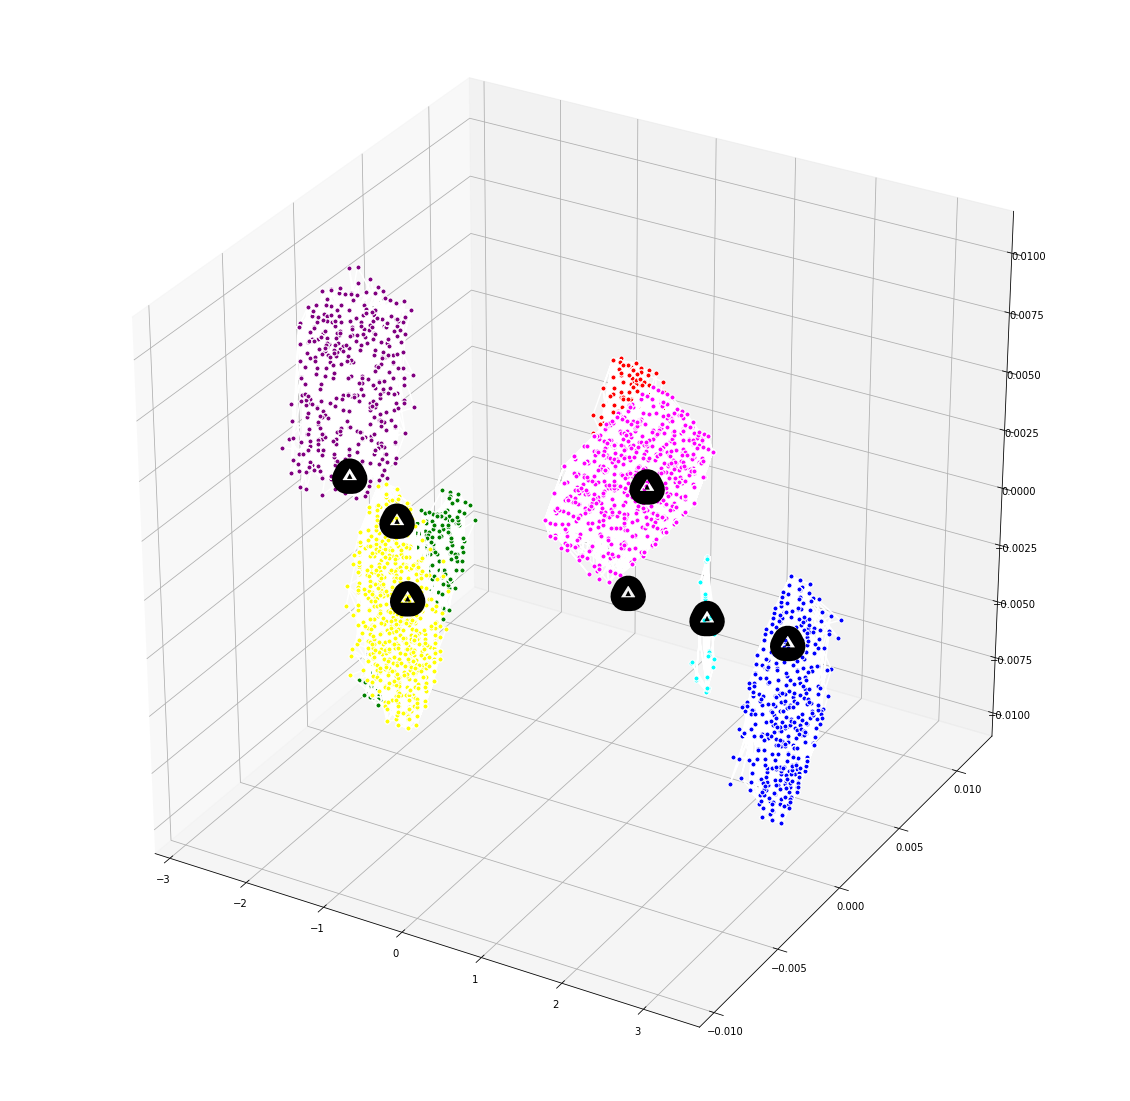

In [198]:
labels3DArr = [0, 1, 2, 3, 4, 5, 6]
colors3DArr = ["blue", "green", "red", "purple", "magenta", "yellow", "cyan"]

clusters3D(pca_dataset, labels3DArr, colors3DArr, k_means.cluster_centers_)

In [199]:
print(metrics.accuracy_score(k_means.labels_,y1_train))

0.4537806759918363


In [200]:
print(k_means.labels_.shape)
print(y1_train.shape)
print(y_train.shape)
print(y1_test.shape)

(20089,)
(20089,)
(25112,)
(5023,)


In [201]:
print(k_means.inertia_)

1.227191031051086


In [202]:
clusters_num_list = [2, 3, 4, 5, 6, 7, 8]

In [203]:
for clustnum in clusters_num_list:
    cluster = KMeans(n_clusters=clustnum, random_state=54)
    model_labels = cluster.fit_predict(pca_dataset)
    #plot
    print("The accuracy score for n=", clustnum, " is ", metrics.accuracy_score(cluster.labels_,y1_train))
    print("The inertia for n=", clustnum, " is ", cluster.inertia_)
    print("The silhouette score for n=", clustnum, " is ", metrics.silhouette_score(x1_train_arr_flatten, model_labels))
    print(" ")

The accuracy score for n= 2  is  0.14057444372542188
The inertia for n= 2  is  22017.795788195057
The silhouette score for n= 2  is  0.6062031540844256
 
The accuracy score for n= 3  is  0.28353825476629
The inertia for n= 3  is  7565.009298339073
The silhouette score for n= 3  is  0.6969471414405674
 
The accuracy score for n= 4  is  0.0
The inertia for n= 4  is  3443.4449872782307
The silhouette score for n= 4  is  0.7427436763286186
 
The accuracy score for n= 5  is  0.0
The inertia for n= 5  is  1614.7906625859337
The silhouette score for n= 5  is  0.871930125264172
 
The accuracy score for n= 6  is  0.34172930459455425
The inertia for n= 6  is  281.416845335218
The silhouette score for n= 6  is  0.9698053243736275
 
The accuracy score for n= 7  is  0.4537806759918363
The inertia for n= 7  is  1.227191031051086
The silhouette score for n= 7  is  0.9897943190532604
 
The accuracy score for n= 8  is  0.4537806759918363
The inertia for n= 8  is  1.071625805669651
The silhouette score 

In [204]:
accuracy_list = []

for acc in range(2,9):
    clust_accuracy = KMeans(n_clusters=acc, random_state=54)
    labelsAcc = clust_accuracy.fit_predict(pca_dataset)
    accuracy = metrics.accuracy_score(clust_accuracy.labels_,y1_train)
    print("The accuracy for n=", acc, " is ", metrics.accuracy_score(clust_accuracy.labels_,y1_train))
    accuracy_list.append(accuracy)

The accuracy for n= 2  is  0.14057444372542188
The accuracy for n= 3  is  0.28353825476629
The accuracy for n= 4  is  0.0
The accuracy for n= 5  is  0.0
The accuracy for n= 6  is  0.34172930459455425
The accuracy for n= 7  is  0.4537806759918363
The accuracy for n= 8  is  0.4537806759918363


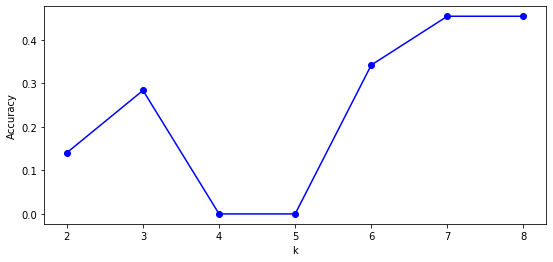

In [205]:
plt.figure(figsize=(9, 4))
plt.plot(range(2, 9), accuracy_list, "bo-")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [206]:
kmeans_elbow_inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=54).fit(pca_dataset)
    kmeans_elbow_inertia.append(kmeans.inertia_)             #(Analytics Vidhya, 2021)

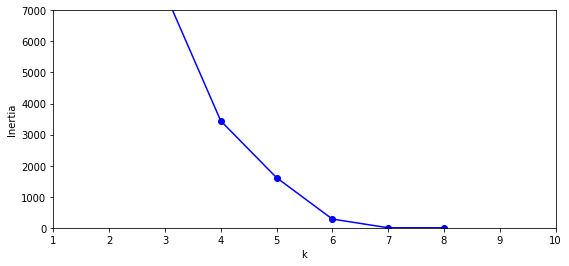

In [207]:
plt.figure(figsize=(9, 4))
plt.plot(range(2, 9), kmeans_elbow_inertia, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.axis([1, 10, 0, 7000])
plt.show()

In [208]:
sil_list = []

for num in range(2,9):
    clust_silhouette = KMeans(n_clusters=num, random_state=54)
    labelsClust = clust_silhouette.fit_predict(pca_dataset)
    silhouette = metrics.silhouette_score(pca_dataset, labelsClust)                #(Analytics Vidhya, 2021)
    print("The silhouette score for n=", num, " is ", metrics.silhouette_score(pca_dataset, labelsClust))
    sil_list.append(silhouette)

The silhouette score for n= 2  is  0.6062316390156064
The silhouette score for n= 3  is  0.6970008281997393
The silhouette score for n= 4  is  0.7428437981998984
The silhouette score for n= 5  is  0.8720853895356451
The silhouette score for n= 6  is  0.9699907189928806
The silhouette score for n= 7  is  0.99003909381747
The silhouette score for n= 8  is  0.8670285218923311


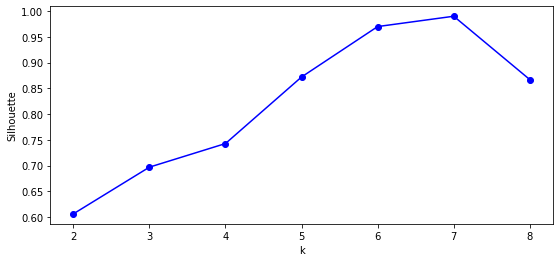

In [209]:
plt.figure(figsize=(9, 4))
plt.plot(range(2, 9), sil_list, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

In [210]:
db_list = []

for db in range(2,9):
    clust_db = KMeans(n_clusters=db, random_state=54)
    labelsDB = clust_db.fit_predict(pca_dataset)
    db_index = metrics.davies_bouldin_score(pca_dataset, labelsDB)                 #(GeeksforGeeks, 2019)
    print("The db index for n=", db, " is ", metrics.davies_bouldin_score(pca_dataset, labelsDB))
    db_list.append(db_index)

The db index for n= 2  is  0.5730941787258782
The db index for n= 3  is  0.4194926996220567
The db index for n= 4  is  0.3232908910700246
The db index for n= 5  is  0.23281089900749352
The db index for n= 6  is  0.06304685794146299
The db index for n= 7  is  0.015286815217023608
The db index for n= 8  is  0.24176889753447112


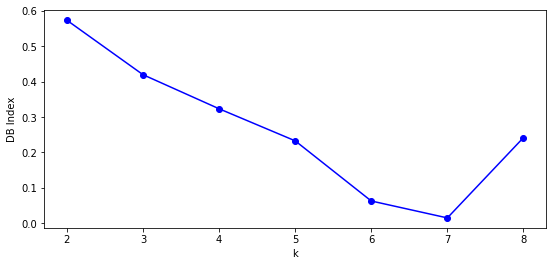

In [211]:
plt.figure(figsize=(9, 4))
plt.plot(range(2, 9), db_list, "bo-")
plt.xlabel("k")
plt.ylabel("DB Index")
plt.show()

In [213]:
ch_list = []

for ch in range(2,9):
    clust_ch = KMeans(n_clusters=ch, random_state=54)
    labelsCH = clust_ch.fit_predict(pca_dataset)
    ch_index = metrics.calinski_harabasz_score(pca_dataset, labelsCH)             #(GeeksforGeeks, 2021)
    print("The ch index for n=", ch, " is ", metrics.calinski_harabasz_score(pca_dataset, labelsCH))
    ch_list.append(ch_index)

The ch index for n= 2  is  39342.25881372857
The ch index for n= 3  is  76436.48013718432
The ch index for n= 4  is  119958.29883712124
The ch index for n= 5  is  197529.3815485104
The ch index for n= 6  is  925736.3549482252
The ch index for n= 7  is  177661952.97029716
The ch index for n= 8  is  174381181.1591702


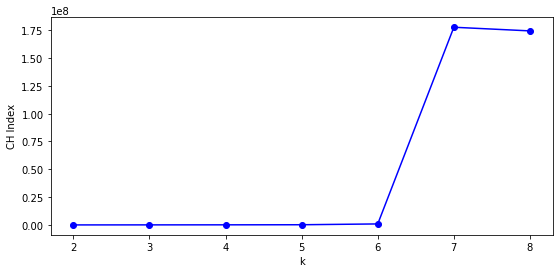

In [215]:
plt.figure(figsize=(9, 4))
plt.plot(range(2, 9), ch_list, "bo-")
plt.xlabel("k")
plt.ylabel("CH Index")
plt.show()

In [219]:
g_mm = GaussianMixture(n_components=7)             #(Analytics Vidhya, 2019)
pred_gmm = g_mm.fit_predict(pca_dataset)

In [220]:
print(type(pred_gmm))

<class 'numpy.ndarray'>


In [223]:
def clusters3D_gmm(dataset, label, color):                 #(naren3256, 2019)
    fig3D = plt.figure(figsize=(20,20))
    ax3D = fig3D.add_subplot(1,1,1, projection='3d')
    
    for i, j in zip(label, color):                    #(will, 2013)
        ax3D.plot(dataset[pred_gmm == i, 0], dataset[pred_gmm == i, 1], dataset[pred_gmm == i, 2], 'w', markerfacecolor=j, marker='.',markersize=10)
    plt.show()

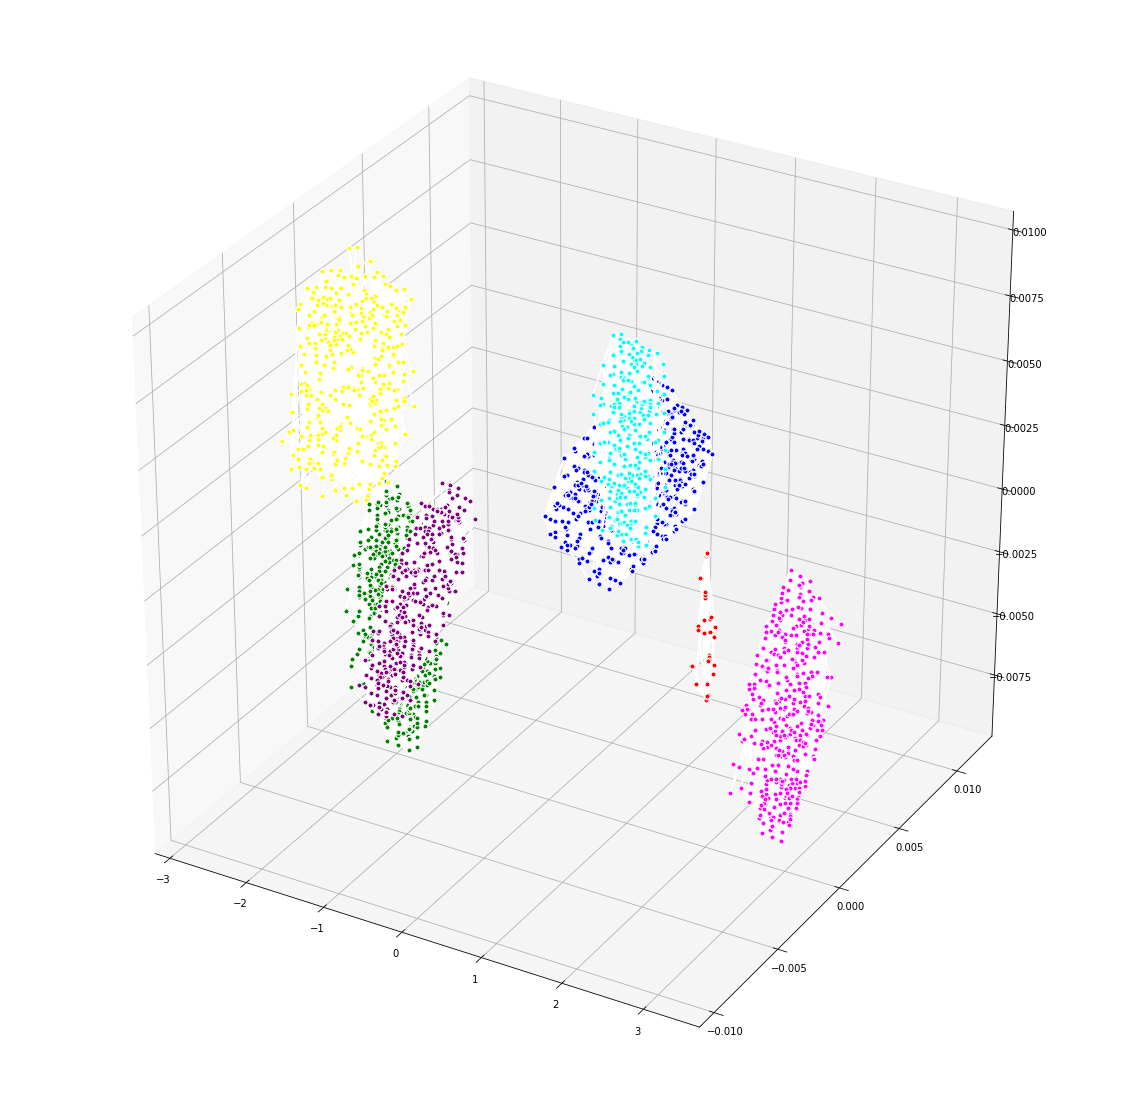

In [224]:
clusters3D_gmm(pca_dataset, labels3DArr, colors3DArr)

In [225]:
g_mm.score(pca_dataset)

168.76971550681614

In [227]:
print(metrics.accuracy_score(pred_gmm,y1_train))

0.0


In [228]:
!pip install fuzzy-c-means

In [230]:
fcm = FCM(n_clusters=7, random_state=54)               #(Satyam Kumar, 2021)
fcm.fit(pca_dataset)

In [231]:
fcm_centers = fcm.centers
pred_fcm = fcm.predict(pca_dataset)

In [232]:
def clusters3DFCM(dataset, label, color, centroids):                 #(naren3256, 2019)
    fig3D = plt.figure(figsize=(20,20))
    ax3D = fig3D.add_subplot(1,1,1, projection='3d')
    
    for i, j in zip(label, color):                    #(will, 2013)
        ax3D.plot(dataset[pred_fcm == i, 0], dataset[pred_fcm == i, 1], dataset[pred_fcm == i, 2], 'w', markerfacecolor=j, marker='.',markersize=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=30, linewidths=30, color='k', alpha=1)
    plt.show()

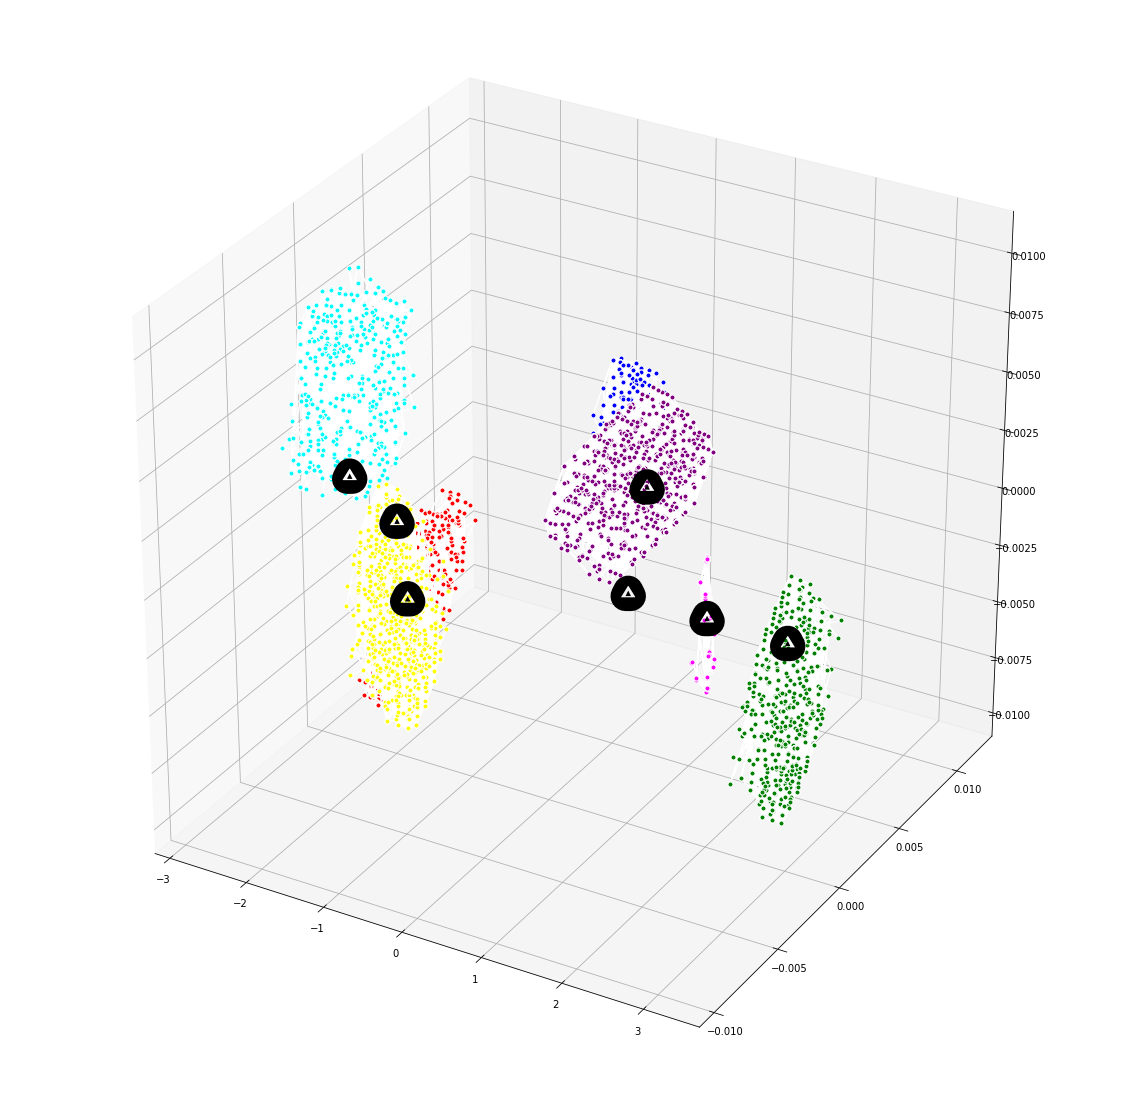

In [234]:
clusters3DFCM(pca_dataset, labels3DArr, colors3DArr, fcm_centers)

In [235]:
print(metrics.accuracy_score(pred_fcm,y1_train))

0.5294937528000399


In [236]:
kmeans_db = KMeans(n_clusters=7, random_state=54)
labels_kmeans_DB = kmeans_db.fit_predict(pca_dataset)
print(metrics.davies_bouldin_score(pca_dataset, labels_kmeans_DB))           ##(GeeksforGeeks, 2019)

0.015286815217023608


In [238]:
gmm_db = GaussianMixture(n_components=7, random_state=54)
labels_gmm_DB = gmm_db.fit_predict(pca_dataset)
print(metrics.davies_bouldin_score(pca_dataset, labels_gmm_DB))    ##(GeeksforGeeks, 2019)

0.015286815217023608


In [241]:
fcm_db = FCM(n_components=7, random_state=54)
fcm.fit(pca_dataset)
labels_fcm_DB = fcm.predict(pca_dataset)
print(metrics.davies_bouldin_score(pca_dataset, labels_fcm_DB))        ##(GeeksforGeeks, 2019)

0.015286815217023606


### **Task 3 - Decision Trees**

#### **References**
GeeksforGeeks. (2017). Python | Decision tree implementation - GeeksforGeeks. [online] <br />Available at: https://www.geeksforgeeks.org/decision-tree-implementation-python/.

<br />
Digital Mind. (2021). Train-test split and cross-validation | Digital Mind. [online] <br />Available at: https://digitalmind.io/post/train-test-split-and-cross-validation.

<br />
<br />
Rahil Shaikh (2018). Cross Validation Explained: Evaluating estimator performance. [online] Medium. <br />Available at: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85.

<br />
<br />
Sticky (2017). UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples. [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi.

<br />
<br />
Framester (2013). How to disable Python warnings? [online] Stack Overflow. <br />Available at: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings.

<br />
<br />
Intrigue777 (2018). Facing ValueError: Target is multiclass but average=“binary.” [online] Stack Overflow. Available at: https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary.

<br />
<br />
scikit-learn. (2013). 3.3. Metrics and scoring: quantifying the quality of predictions. [online] <br />Available at: https://scikit-learn.org/stable/modules/model_evaluation.html.

In [242]:
pca4 = PCA(5).fit(imgArr_flatten) 

In [243]:
X_train_DT = pca4.transform(imgArr_flatten)

In [244]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X_train_DT, labelsArr, test_size=0.3)

In [245]:
tree_clf5 = DecisionTreeClassifier(max_depth=2, random_state=42)          #(GeeksforGeeks, 2017)
dtVar5 = tree_clf5.fit(x_train6, y_train6)

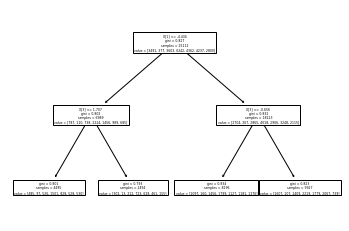

In [246]:
plot_tree(tree_clf5);

In [247]:
dtVar5.score(x_test6, y_test6)

0.25513332713927345

In [248]:
tree_clf6 = DecisionTreeClassifier(max_depth=3, random_state=42)    #(GeeksforGeeks, 2017)
dtVar6 = tree_clf6.fit(x_train6, y_train6)

In [249]:
dtVar6.score(x_test6, y_test6)

0.25940722846789926

In [250]:
tree_clf7 = DecisionTreeClassifier(max_depth=4, random_state=42)     #(GeeksforGeeks, 2017)
dtVar7 = tree_clf7.fit(x_train6, y_train6)

In [251]:
dtVar7.score(x_test6, y_test6)

0.2582922976865186

In [252]:
tree_clf8 = DecisionTreeClassifier(max_depth=5, random_state=42)     #(GeeksforGeeks, 2017)
dtVar8 = tree_clf8.fit(x_train6, y_train6)

In [253]:
dtVar8.score(x_test6, y_test6)

0.2642385951872155

In [254]:
tree_clf9 = DecisionTreeClassifier(max_depth=6, random_state=42)     #(GeeksforGeeks, 2017)
dtVar9 = tree_clf9.fit(x_train6, y_train6)

In [255]:
dtVar9.score(x_test6, y_test6)

0.2670259221406671

In [256]:
tree_clf10 = DecisionTreeClassifier(max_depth=7, random_state=42)      #(GeeksforGeeks, 2017)
dtVar10 = tree_clf10.fit(x_train6, y_train6)

In [257]:
dtVar10.score(x_test6, y_test6)

0.2638669515934219

In [259]:
tree_clf11 = DecisionTreeClassifier(max_depth=8, random_state=42)     #(GeeksforGeeks, 2017)
dtVar11 = tree_clf11.fit(x_train6, y_train6)

In [260]:
dtVar11.score(x_test6, y_test6)

0.26461023878100903

In [261]:
tree_clf12 = DecisionTreeClassifier(max_depth=9, random_state=42)           #(GeeksforGeeks, 2017)
dtVar12 = tree_clf12.fit(x_train6, y_train6)

In [262]:
dtVar12.score(x_test6, y_test6)

0.2638669515934219

In [263]:
node_list = []

for num in range(2,10):
    tree_nodeDT = DecisionTreeClassifier(max_depth=num, random_state=42)       #(GeeksforGeeks, 2017)
    dt_fitscore = tree_nodeDT.fit(x_train6, y_train6)
    dt_fitscore.score(x_test6, y_test6)
    print("The score for max_depth=", num, " is ", dt_fitscore.score(x_test6, y_test6))
    node_list.append(dt_fitscore.score(x_test6, y_test6))

The score for max_depth= 2  is  0.25513332713927345
The score for max_depth= 3  is  0.25940722846789926
The score for max_depth= 4  is  0.2582922976865186
The score for max_depth= 5  is  0.2642385951872155
The score for max_depth= 6  is  0.2670259221406671
The score for max_depth= 7  is  0.2638669515934219
The score for max_depth= 8  is  0.26461023878100903
The score for max_depth= 9  is  0.2638669515934219


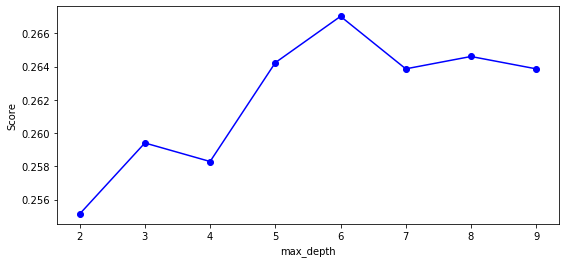

In [264]:
plt.figure(figsize=(9, 4))
plt.plot(range(2, 10), node_list, "bo-")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.show()

In [266]:
tree_clf_kfold = DecisionTreeClassifier(max_depth=6, random_state=42)       #(GeeksforGeeks, 2017)

In [267]:
print(x_train.shape)
print(y_train.shape)

(25112, 2304)
(25112,)


In [268]:
scores_kfold = cross_val_score(tree_clf_kfold, imgArr_flatten, labelsArr, cv=10)     #(Digital Mind, 2021)
print ("Cross-validated scores:", scores_kfold)

Cross-validated scores: [0.29960981 0.29793757 0.29960981 0.29570792 0.2951505  0.3038751
 0.29746306 0.29997212 0.29829941 0.29021466]


In [269]:
accuracy = cross_val_score(tree_clf_kfold, imgArr_flatten, labelsArr, cv=10, scoring='accuracy')   #(Rahil Shaikh, 2018)
print ("Cross-validated accuracies:", accuracy)

Cross-validated accuracies: [0.29960981 0.29793757 0.29960981 0.29570792 0.2951505  0.3038751
 0.29746306 0.29997212 0.29829941 0.29021466]


In [270]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 29.778399733460887


In [271]:
f1_score = cross_val_score(tree_clf_kfold, imgArr_flatten, labelsArr, cv=10, scoring='f1_weighted')    #(Sticky, 2017)
print ("Cross-validated f1 scores:", f1_score)

Cross-validated f1 scores: [0.25306655 0.24116218 0.2514491  0.2515181  0.24791264 0.26264559
 0.26194423 0.24510573 0.24897807 0.25173122]


In [272]:
print("F1-Score of Model with Cross Validation is:",f1_score.mean() * 100)

F1-Score of Model with Cross Validation is: 25.155134242994688


In [273]:
import warnings
warnings.filterwarnings("ignore")           #(Framester, 2013)

precision = cross_val_score(tree_clf_kfold, imgArr_flatten, labelsArr, cv=10, scoring='precision_weighted')  #(Intrigue777, 2018)
print ("Cross-validated precision scores:", precision)

Cross-validated precision scores: [0.26266587 0.26617538 0.25411319 0.25921882 0.26189447 0.26246278
 0.26191422 0.24824062 0.26094556 0.25730959]


In [274]:
print("Precision of Model with Cross Validation is:",precision.mean() * 100)

Precision of Model with Cross Validation is: 25.94940491316275


In [275]:
import warnings
warnings.filterwarnings("ignore") 

recall = cross_val_score(tree_clf_kfold, imgArr_flatten, labelsArr, cv=10, scoring='recall_weighted')  #(Intrigue777, 2018)
print ("Cross-validated recall scores:", recall)

Cross-validated recall scores: [0.29960981 0.29793757 0.29960981 0.29570792 0.2951505  0.3038751
 0.29746306 0.29997212 0.29829941 0.29021466]


In [276]:
print("Recall of Model with Cross Validation is:",recall.mean() * 100)

Recall of Model with Cross Validation is: 29.778399733460887


In [277]:
x_train13, x_test13, y_train13, y_test13 = train_test_split(X_train_DT, labelsArr, test_size=0.6)

In [278]:
tree_clf14 = DecisionTreeClassifier(max_depth=2, random_state=42)
dtVar14 = tree_clf14.fit(x_train13, y_train13)

In [279]:
dtVar14.score(x_test13, y_test13)

0.2507781649245064

In [280]:
tree_clf15 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtVar15 = tree_clf15.fit(x_train13, y_train13)

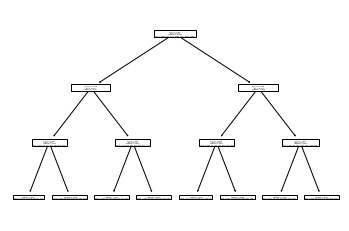

In [281]:
plot_tree(tree_clf15);

In [282]:
dtVar15.score(x_test13, y_test13)

0.2534262485481998

In [283]:
tree_clf16 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtVar16 = tree_clf16.fit(x_train13, y_train13)

In [284]:
dtVar16.score(x_test13, y_test13)

0.25932636469221837

### **Task 4 - NN**

#### **References**
piush.vaish (2016). Linear Classification method with ScikitLearn - A Data Analyst. [online] A Data Analyst. <br />Available at: https://adataanalyst.com/scikit-learn/linear-classification-method/.

<br />
Michał Oleszak (2019). Linear Classifiers: An Overview - Towards Data Science. [online] Medium. <br />Available at: https://towardsdatascience.com/linear-classifiers-an-overview-e121135bd3bb

<br />
<br />
scikit-learn. (2015). sklearn.neural_network.MLPClassifier. [online] <br />Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

<br />
<br />
Analytics Vidhya. (2021). CNN For Image Classification | Image Classification Using CNN. [online] <br />Available at: https://www.analyticsvidhya.com/blog/2021/01/image-classification-using-convolutional-neural-networks-a-step-by-step-guide/.

<br />
<br />
TensorFlow. (2021). tf.keras.layers.MaxPool2D  |  TensorFlow Core v2.7.0. [online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

<br />
<br />
Sabyasachi Sahoo (2018). Deciding optimal kernel size for CNN - Towards Data Science. [online] Medium. <br />Available at: https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363.

In [285]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [286]:
#without 10 fold - SGD

In [287]:
linClass = SGDClassifier()     #(piush.vaish, 2016)

In [ ]:
linFit = linClass.fit(x_train, y_train)    ##(piush.vaish, 2016)

In [ ]:
linFit.score(x_test, y_test)    ##(piush.vaish, 2016)

In [ ]:
#with 10 fold - SGD

In [ ]:
kfold_lin = cross_val_score(linClass, x_train, y_train, cv=10)     #(Digital Mind, 2021)
print ("Cross-validated scores - ", kfold_lin)

In [ ]:
accuracyLin = cross_val_score(linClass, x_train, y_train, cv=10, scoring='accuracy')    ##(Rahil Shaikh, 2018)
print ("Cross-validated accuracies:", accuracyLin)

In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracyLin.mean() * 100)

In [ ]:
linLDA = LinearDiscriminantAnalysis()     #(Michał Oleszak, 2019)

In [ ]:
linLDAFit = linLDA.fit(x_train, y_train)     ##(Michał Oleszak, 2019)

In [ ]:
linLDAFit.score(x_test, y_test)     ##(Michał Oleszak, 2019)

In [ ]:
linLog = LogisticRegression()   ##(Michał Oleszak, 2019)

In [ ]:
linLogFit = linLog.fit(x_train, y_train)    ##(Michał Oleszak, 2019)

In [ ]:
linLogFit.score(x_test, y_test)    ##(Michał Oleszak, 2019)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#(scikit-learn, 2015)
linMLP = MLPClassifier(random_state=2, max_iter=300, hidden_layer_sizes=(150,150,150), activation='relu', learning_rate='constant', momentum=0.9)

In [ ]:
linMLPFit = linMLP.fit(x_train, y_train)

In [ ]:
linMLPFit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP1 = MLPClassifier(random_state=1, max_iter=550, hidden_layer_sizes=(120,120,120), activation='relu', learning_rate='constant', momentum=0.15)

In [ ]:
linMLP1Fit = linMLP1.fit(x_train, y_train)

In [ ]:
linMLP1Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP2 = MLPClassifier(random_state=2, max_iter=700, hidden_layer_sizes=(100,100,100), activation='relu', learning_rate='constant', momentum=0.25)

In [ ]:
linMLP2Fit = linMLP2.fit(x_train, y_train)

In [ ]:
linMLP2Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP3 = MLPClassifier(random_state=1, max_iter=800, hidden_layer_sizes=(50,50,50), activation='relu', learning_rate='constant', momentum=0.30)

In [ ]:
linMLP3Fit = linMLP3.fit(x_train, y_train)

In [ ]:
linMLP3Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP4 = MLPClassifier(random_state=2, max_iter=300, hidden_layer_sizes=(150,150,150), activation='tanh', learning_rate='invscaling', momentum=0.9)

In [ ]:
linMLP4Fit = linMLP4.fit(x_train, y_train)

In [ ]:
linMLP4Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP7 = MLPClassifier(random_state=1, max_iter=550, hidden_layer_sizes=(120,120,120), activation='tanh', learning_rate='invscaling', momentum=0.15)

In [ ]:
linMLP7Fit = linMLP7.fit(x_train, y_train)

In [ ]:
linMLP7Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP5 = MLPClassifier(random_state=2, max_iter=700, hidden_layer_sizes=(100,100,100), activation='tanh', learning_rate='invscaling', momentum=0.25)

In [ ]:
linMLP5Fit = linMLP5.fit(x_train, y_train)

In [ ]:
linMLP5Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP6 = MLPClassifier(random_state=1, max_iter=800, hidden_layer_sizes=(50,50,50), activation='tanh', learning_rate='invscaling', momentum=0.30)

In [ ]:
linMLP6Fit = linMLP6.fit(x_train, y_train)

In [ ]:
linMLP6Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP8 = MLPClassifier(random_state=2, max_iter=300, hidden_layer_sizes=(150,150,150), activation='logistic', learning_rate='adaptive', momentum=0.9)

In [ ]:
linMLP8Fit = linMLP8.fit(x_train, y_train)

In [ ]:
linMLP8Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP9 = MLPClassifier(random_state=1, max_iter=550, hidden_layer_sizes=(120,120,120), activation='logistic', learning_rate='adaptive', momentum=0.15)

In [ ]:
linMLP9Fit = linMLP9.fit(x_train, y_train)

In [ ]:
linMLP9Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP10 = MLPClassifier(random_state=2, max_iter=700, hidden_layer_sizes=(100,100,100), activation='logistic', learning_rate='adaptive', momentum=0.25)

In [ ]:
linMLP10Fit = linMLP10.fit(x_train, y_train)

In [ ]:
linMLP10Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP11 = MLPClassifier(random_state=1, max_iter=800, hidden_layer_sizes=(50,50,50), activation='logistic', learning_rate='adaptive', momentum=0.30)

In [ ]:
linMLP11Fit = linMLP11.fit(x_train, y_train)

In [ ]:
linMLP11Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP12 = MLPClassifier(random_state=2, max_iter=300, hidden_layer_sizes=(150,150,150), activation='identity', learning_rate='constant', momentum=0.9)

In [ ]:
linMLP12Fit = linMLP12.fit(x_train, y_train)

In [ ]:
linMLP12Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP13 = MLPClassifier(random_state=1, max_iter=550, hidden_layer_sizes=(120,120,120), activation='identity', learning_rate='constant', momentum=0.15)

In [ ]:
linMLP13Fit = linMLP13.fit(x_train, y_train)

In [ ]:
linMLP13Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP14 = MLPClassifier(random_state=2, max_iter=700, hidden_layer_sizes=(100,100,100), activation='identity', learning_rate='constant', momentum=0.25)

In [ ]:
linMLP14Fit = linMLP14.fit(x_train, y_train)

In [ ]:
linMLP14Fit.score(x_test, y_test)

In [ ]:
#(scikit-learn, 2015)
linMLP15 = MLPClassifier(random_state=1, max_iter=800, hidden_layer_sizes=(50,50,50), activation='identity', learning_rate='constant', momentum=0.30)

In [ ]:
linMLP15Fit = linMLP15.fit(x_train, y_train)

In [ ]:
linMLP15Fit.score(x_test, y_test)

In [ ]:
print(imgArr.shape)

In [ ]:
x_trainCNN, x_testCNN, y_trainCNN, y_testCNN = train_test_split(imgArr, labelsArr, test_size=0.3)

In [ ]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
#(Analytics Vidhya, 2021)
cnnModel = tf.keras.Sequential([tf.keras.layers.Conv2D(48, (3,3), activation='relu', input_shape=(48, 48, 1)),
                               tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),    #(TensorFlow, 2021)
                               tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
                               tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
                               tf.keras.layers.Dropout(0.7),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(134, activation='relu'),
                               tf.keras.layers.Dense(7,  activation='softmax')])

In [ ]:
cnnModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  #(Analytics Vidhya, 2021)
cnnModel.fit(x_trainCNN, y_trainCNN, epochs=10)

In [ ]:
cnnModel.evaluate(x_testCNN,y_testCNN , verbose=2)   #(Analytics Vidhya, 2021)

In [ ]:
#(Analytics Vidhya, 2021)
cnnModel1 = tf.keras.Sequential([tf.keras.layers.Conv2D(39, (5,5), activation='relu', input_shape=(48, 48, 1)),
                               tf.keras.layers.MaxPooling2D((2, 2), strides=(1,1)),    #(TensorFlow, 2021)
                               tf.keras.layers.Conv2D(39, (5,5), activation='relu'),
                               tf.keras.layers.MaxPooling2D((2, 2), strides=(1,1)),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(134, activation='relu'),
                               tf.keras.layers.Dense(7,  activation='softmax')])

In [ ]:
cnnModel1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])     #(Analytics Vidhya, 2021)
cnnModel1.fit(x_trainCNN, y_trainCNN, epochs=10)

In [ ]:
cnnModel1.evaluate(x_testCNN,y_testCNN , verbose=2)    #(Analytics Vidhya, 2021)